In [1]:
pip install pystan

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 41.9 MB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 91 kB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 59.9 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 59.7 MB/s eta 0:00:01
ERROR: httpstan 4.4.2 has requirement aiohttp<4.0,>=3.7, but you'll have aiohttp 3.6.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install prophet

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 65 kB 5.7 MB/s  eta 0:00:01
     |████████████████████████████████| 2.0 MB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 67.3 MB 263 kB/s  eta 0:00:01
     |████████████████████████████████| 47 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 68.1 MB/s eta 0:00:01
     |████████████████████████████████| 179 kB 72.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 55.7 MB/s eta 0:00:01


In [3]:
#import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from project_lib import Project
#credentials removed

import prophet
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

import pickle
import json
from prophet.serialize import model_to_json, model_from_json

In [55]:
# The code was removed by Watson Studio for sharing.

date    country  customer_id     year  month    day  times_viewed  \
0  2017-11-28  Australia     293778.0  36306.0  198.0  504.0          97.0   
1  2017-11-28    Austria          NaN      NaN    NaN    NaN           NaN   
2  2017-11-28    Bahrain          NaN      NaN    NaN    NaN           NaN   
3  2017-11-28    Belgium      12362.0   2017.0   11.0   28.0           1.0   
4  2017-11-28    Bermuda          NaN      NaN    NaN    NaN           NaN   

   price  
0   40.4  
1    NaN  
2    NaN  
3  130.0  
4    NaN

In [5]:
#PRE-PROCESSING

In [56]:
#drop unneeded columns
df.drop(['customer_id','year', 'month', 'day','times_viewed'], axis=1, inplace=True)
df

date               country    price
0      2017-11-28             Australia    40.40
1      2017-11-28               Austria      NaN
2      2017-11-28               Bahrain      NaN
3      2017-11-28               Belgium   130.00
4      2017-11-28               Bermuda      NaN
...           ...                   ...      ...
21280  2019-07-31                   USA      NaN
21281  2019-07-31  United Arab Emirates      NaN
21282  2019-07-31        United Kingdom  4844.04
21283  2019-07-31           Unspecified      NaN
21284  2019-07-31           West Indies      NaN

[21285 rows x 3 columns]

In [57]:
#list top 10 countries for filtering
top10countries = ['United Kingdom','EIRE','Germany','France','Norway','Spain','Hong Kong','Portugal','Singapore','Netherlands']

In [58]:
#filter out rows which are not in the top 10, save into new dataframe 'dftop10'
top10indexes = df['country'].isin(top10countries)
dftop10 = df.copy()
dftop10 = dftop10[top10indexes]
dftop10

date         country    price
11     2017-11-28            EIRE   375.99
14     2017-11-28          France   134.25
15     2017-11-28         Germany   139.03
17     2017-11-28       Hong Kong      NaN
26     2017-11-28     Netherlands      NaN
...           ...             ...      ...
21270  2019-07-31          Norway      NaN
21272  2019-07-31        Portugal     1.25
21275  2019-07-31       Singapore      NaN
21276  2019-07-31           Spain      NaN
21282  2019-07-31  United Kingdom  4844.04

[4950 rows x 3 columns]

In [59]:
#make price NaN values 0
dftop10['price'].fillna(0, inplace=True)
#check it's worked
dftop10.isna().sum()

date       0
country    0
price      0
dtype: int64

In [11]:
#save as csv to IBM Watson Studio project
#dftop10.to_csv('training_data_preprocessed.csv')
#project.save_data(data=dftop10.to_csv(index=True),file_name='training_data_preprocessed.csv',overwrite=True)

In [60]:
#check head, tail and value counts before proceeding
dftop10.head()

date      country   price
11  2017-11-28         EIRE  375.99
14  2017-11-28       France  134.25
15  2017-11-28      Germany  139.03
17  2017-11-28    Hong Kong    0.00
26  2017-11-28  Netherlands    0.00

In [61]:
dftop10.tail()

date         country    price
21270  2019-07-31          Norway     0.00
21272  2019-07-31        Portugal     1.25
21275  2019-07-31       Singapore     0.00
21276  2019-07-31           Spain     0.00
21282  2019-07-31  United Kingdom  4844.04

In [62]:
dftop10['country'].value_counts()

United Kingdom    495
Hong Kong         495
Spain             495
Portugal          495
Netherlands       495
Singapore         495
Norway            495
Germany           495
France            495
EIRE              495
Name: country, dtype: int64

In [63]:
#make date column datetime type and country column categorical
dftop10['date'] = pd.to_datetime(dftop10['date'])
dftop10['country'] = dftop10.country.astype('category')
dftop10.dtypes

date       datetime64[ns]
country          category
price             float64
dtype: object

In [64]:
#rename columns for fbprophet requirements
dftop10.columns = ['ds','country','y']

In [65]:
dftop10

ds         country        y
11    2017-11-28            EIRE   375.99
14    2017-11-28          France   134.25
15    2017-11-28         Germany   139.03
17    2017-11-28       Hong Kong     0.00
26    2017-11-28     Netherlands     0.00
...          ...             ...      ...
21270 2019-07-31          Norway     0.00
21272 2019-07-31        Portugal     1.25
21275 2019-07-31       Singapore     0.00
21276 2019-07-31           Spain     0.00
21282 2019-07-31  United Kingdom  4844.04

[4950 rows x 3 columns]

In [19]:
#PREPROCESSING END

In [20]:
#COMMENCE MODEL BUILDING

In [21]:
#modeling approach:

'''
1. Split dataframes into 10 dataframes, 1 per country


***BUILD AND CHOOSE BASE MODEL***

2. For each country, create models A, B and C as per below train test splits

3. Evaluate model performance for each country's model through the mean of all Mean Absolute Errors (MAE) for each country, and visualisation of this

Base models will be chosen from the 3 below models:

All datasets have months inclusive

Model A
Training data = Nov 17 - Dec 18
Testing data = Jun 19 - Jul 19

Model B
Training data = Nov 17 - Jul 18
Testing data = Aug 18 - Jul 19

Model C (train and test on all data)
Training data = Nov 17 - Jul 19
Testing data = Nov 17 - Jul 19


***CROSS VALIDATION***

5.Cross validation will be performed on the base model with hyperparameter horizon = 30 on all 10 countries, to further validate evaulations


***FURTHER MODELS***

6. Time allowing, models from stats models packages and gaussian process models will be explored, built and evaluated


***MODEL SELECTION AND PERSISTENCE***
7. Evaluation metrics will be assessed and the selected model will be persisted


***(PART 3) DEPLOY AND TEST WITH PROVIDED 'cs-production' data
8. Deploy selected model, test with Aug-Dec 2019 data

9. Compare predicted vs actuals through MAE evaulation metric

'''

"\n1. Split dataframes into 10 dataframes, 1 per country\n\n\n***BUILD AND CHOOSE BASE MODEL***\n\n2. For each country, create models A, B and C as per below train test splits\n\n3. Evaluate model performance for each country's model through the mean of all Mean Absolute Errors (MAE) for each country, and visualisation of this\n\nBase models will be chosen from the 3 below models:\n\nAll datasets have months inclusive\n\nModel A\nTraining data = Nov 17 - Dec 18\nTesting data = Jun 19 - Jul 19\n\nModel B\nTraining data = Nov 17 - Jul 18\nTesting data = Aug 18 - Jul 19\n\nModel C (train and test on all data)\nTraining data = Nov 17 - Jul 19\nTesting data = Nov 17 - Jul 19\n\n\n***CROSS VALIDATION***\n\n5.Cross validation will be performed on the base model with hyperparameter horizon = 30 on all 10 countries, to further validate evaulations\n\n\n***FURTHER MODELS***\n\n6. Time allowing, models from stats models packages and gaussian process models will be explored, built and evaluated\n\

In [66]:
#split dataframe into individual countries for training, save dataframes to values of a dictionary with keys 'df_<first 2 letters of the country>'
#e.g. 'df_Un' for United Kingdom
df_individual_countries = {}

for c in top10countries:
    dfname = 'df_' + str(c)[:2]
    df_subsetted = dftop10[dftop10['country'] == c]
    df_individual_countries[dfname] = df_subsetted


INFO:numexpr.utils:Note: NumExpr detected 56 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


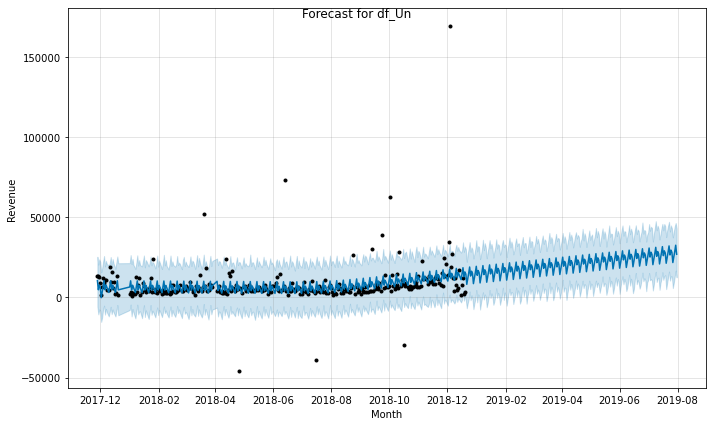

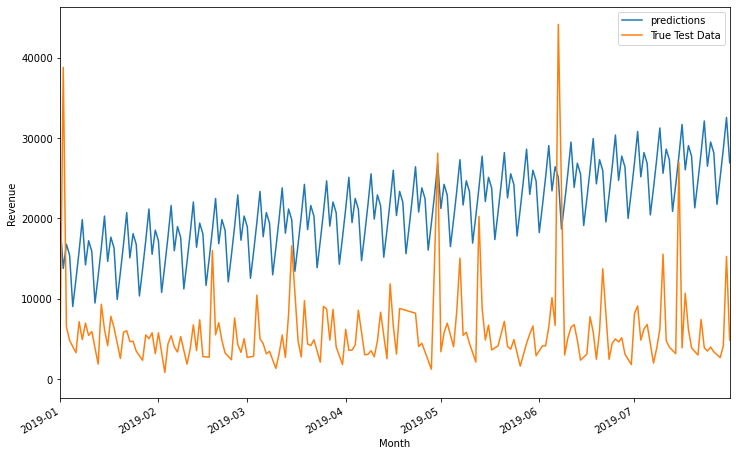

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


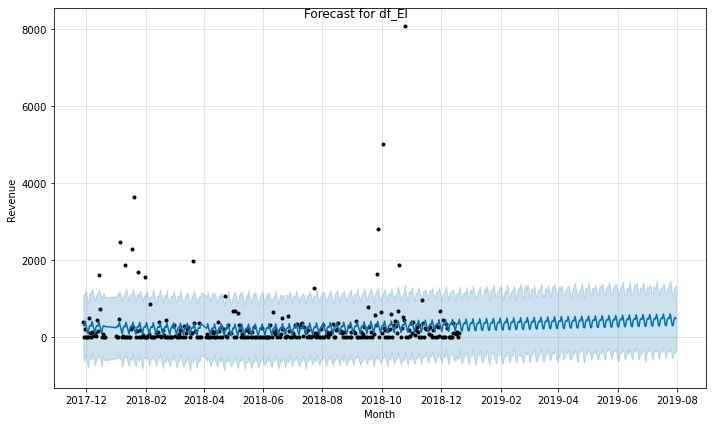

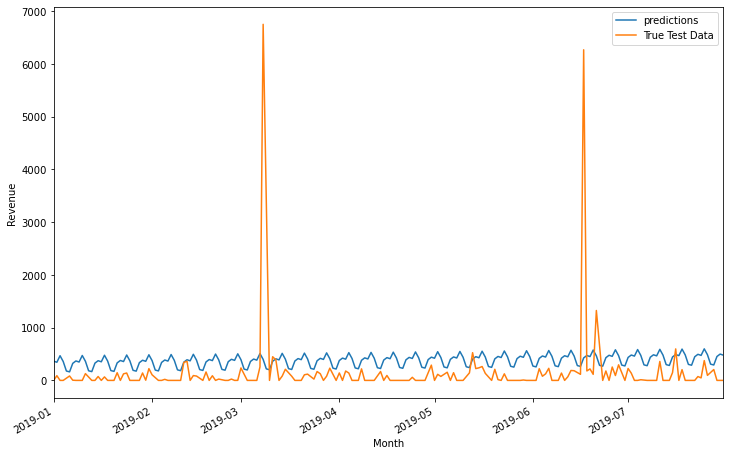

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


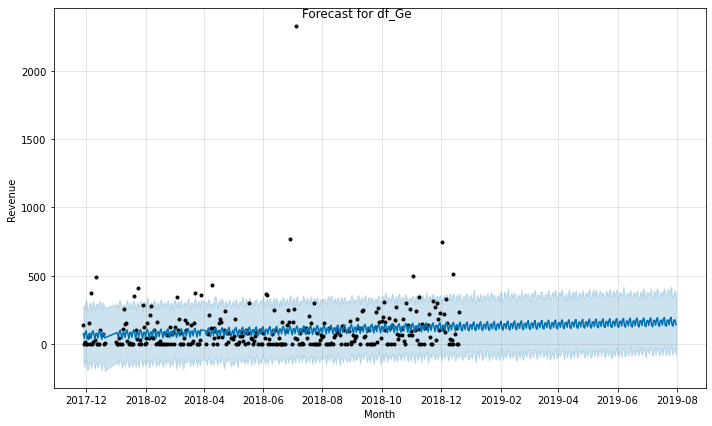

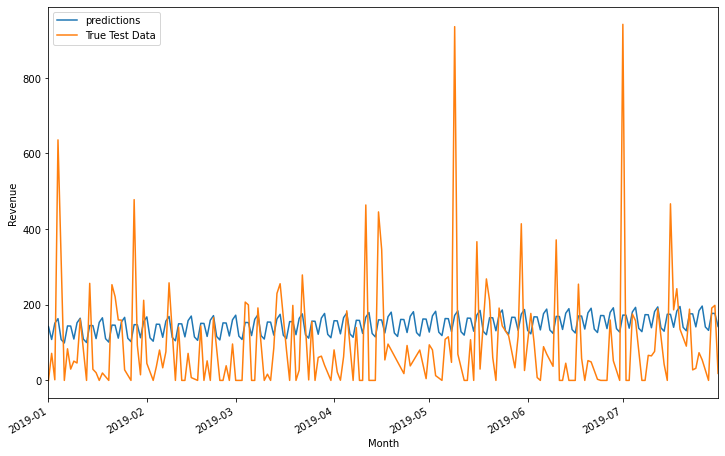

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


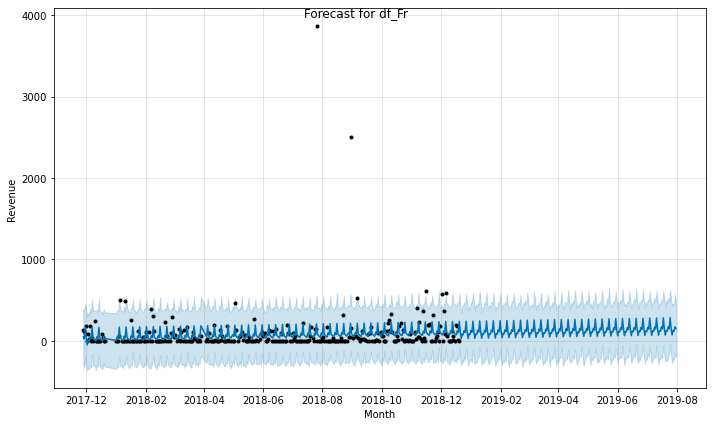

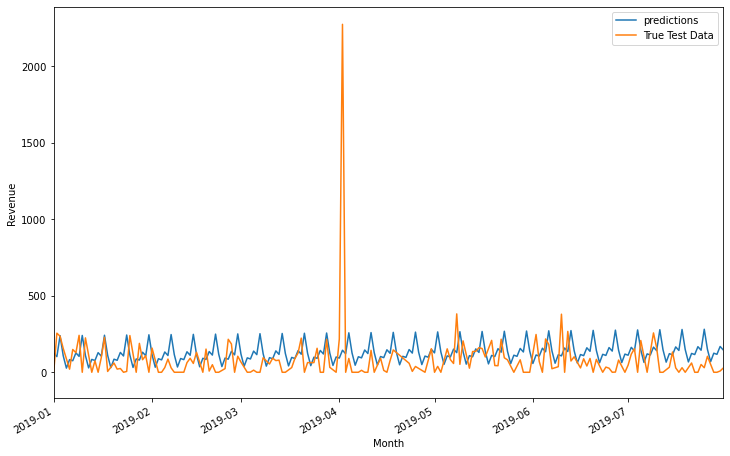

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


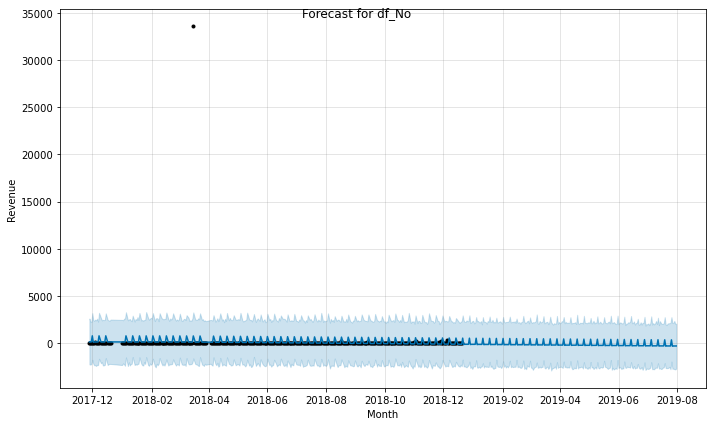

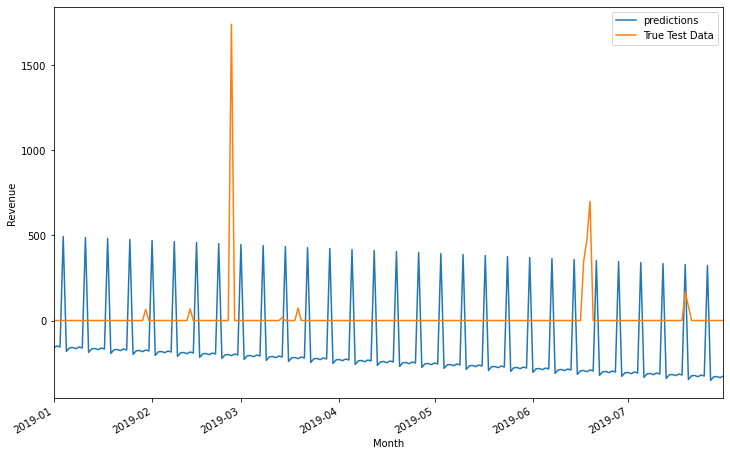

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


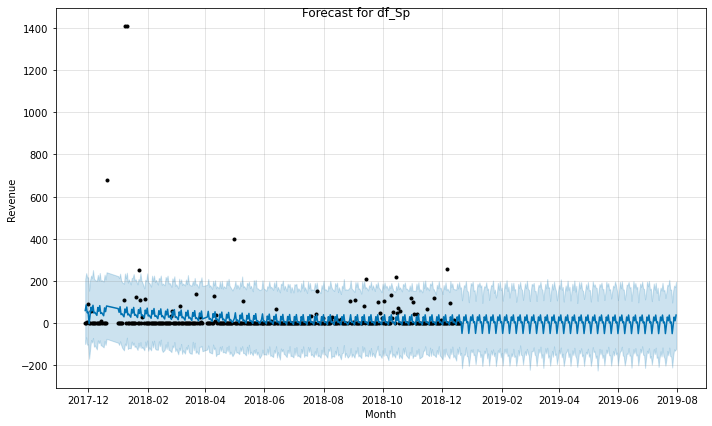

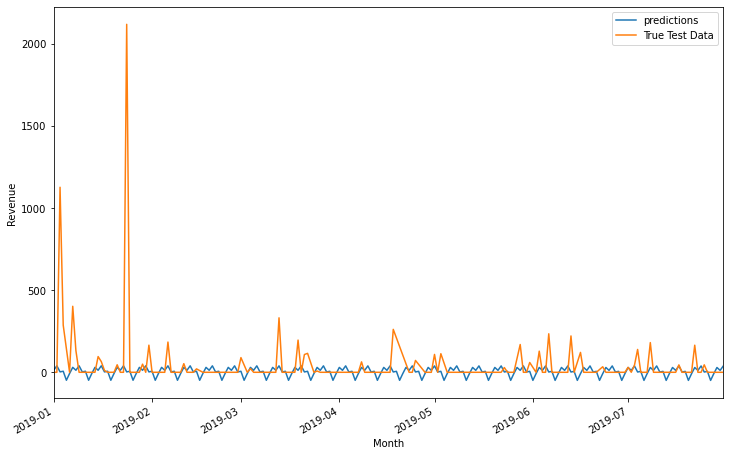

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


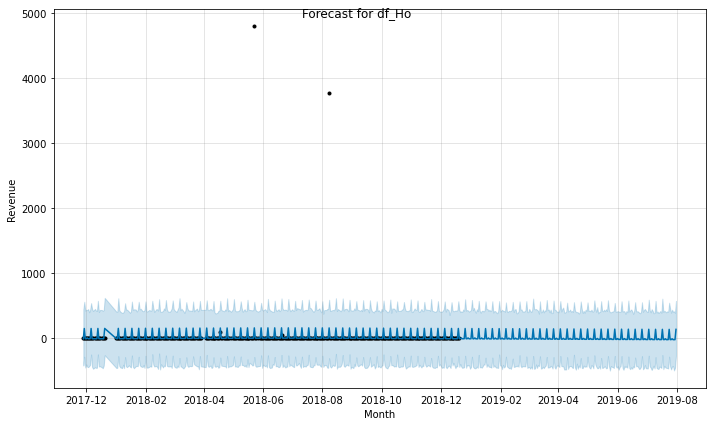

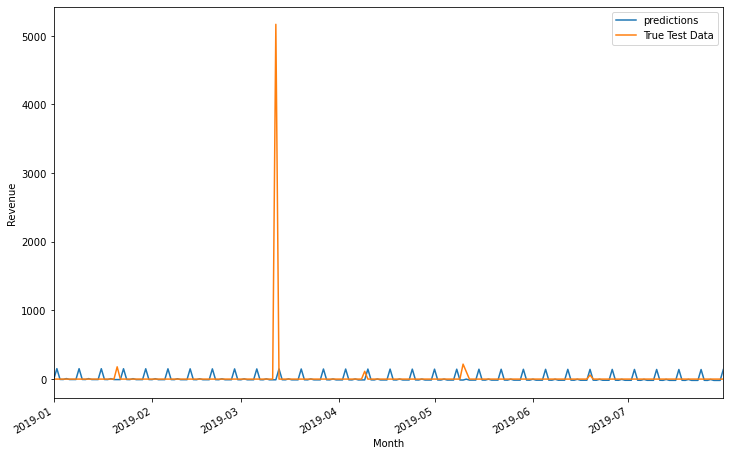

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


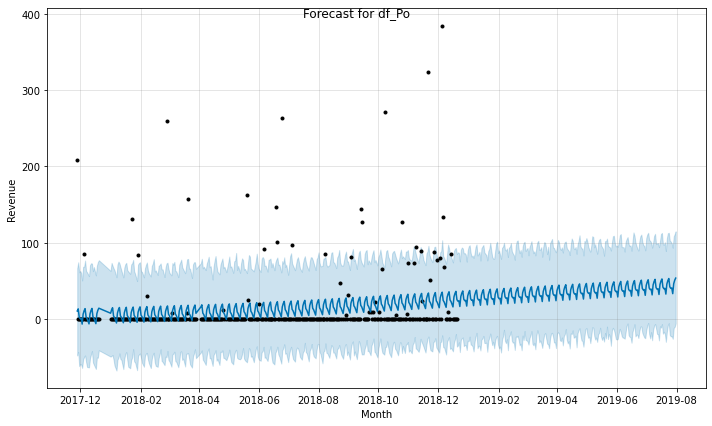

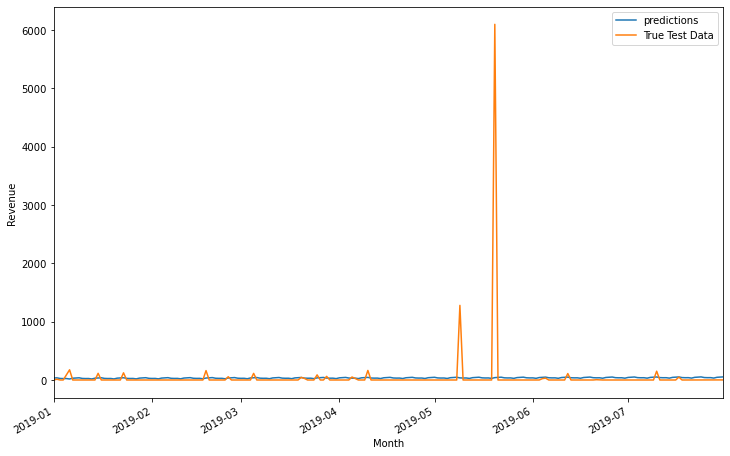

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


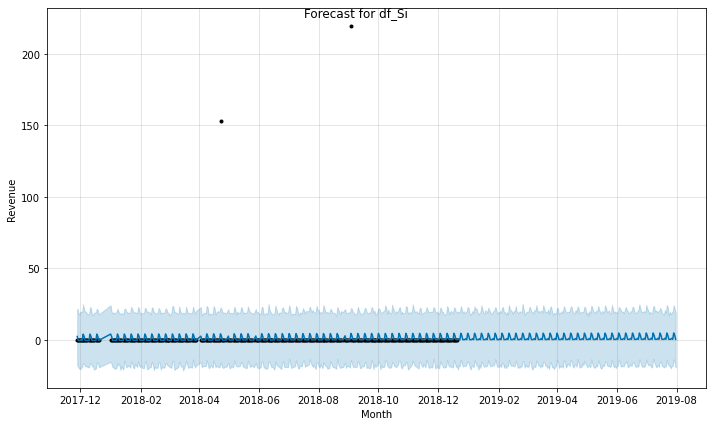

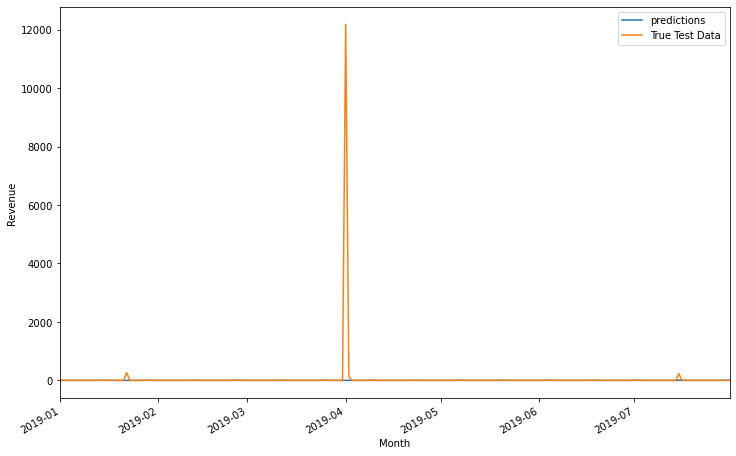

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


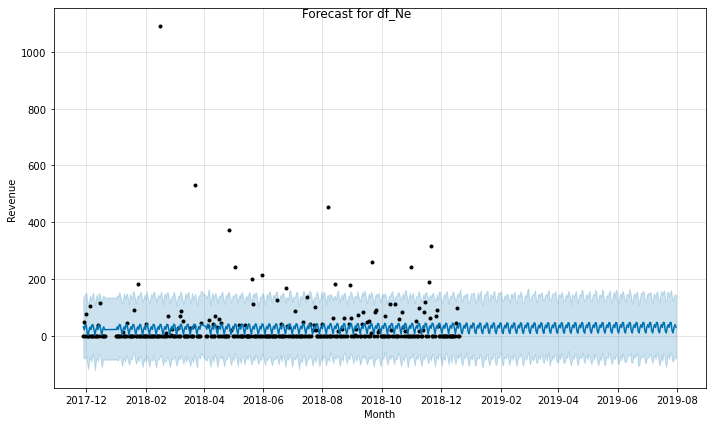

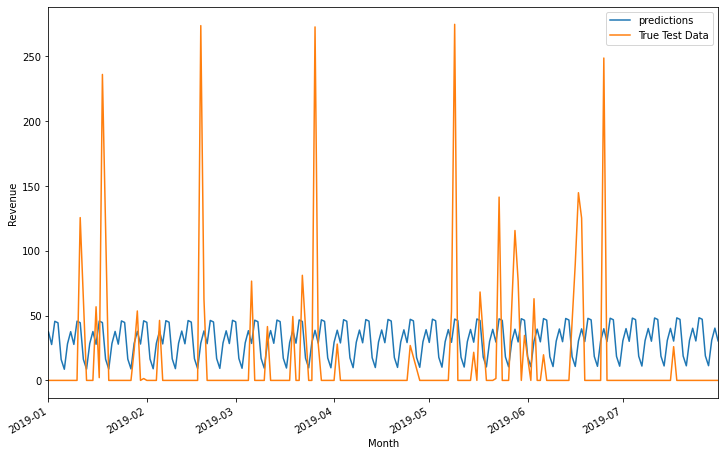

In [23]:
#perform train-test-split for each country
#then, for each country:
#   train a model on the training data
#   create a forecast for test data start -> test data end
#   save predictions in a dictionary
#   visualise model fit on training data + forecast
#   visualise model predictions vs test data

#base model A

predictions = {}

for dfname, df in df_individual_countries.items():
    train = df[df['ds'] <= '2018-12-31']
    test = df[df['ds'] >= '2019-01-01']
    model = Prophet()
    model.fit(train)
    future = model.make_future_dataframe(periods=223)
    prediction = model.predict(future)
    predictions[dfname] = prediction
    forecast = model.plot(prediction)
    forecast.suptitle('Forecast for ' + str(dfname))
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()
    ax = prediction.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    predictionsvstestdata = test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2019-01-01','2019-07-31'))
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()


In [69]:
#for base model A, loop over predictions, subset predictions to get test data only, and merge in true values from test data
#calculate errors (y - yhat) and calulate base model A MAEs for each top 10 country
for dfname, pred in predictions.items():
    pred = pred[pred['ds'] >= '2019-01-01']
    pred_merged = pd.merge(right=df_individual_countries[dfname][['ds', 'y']], left=pred, how='left', on='ds')
    pred_merged['y'].fillna(0, inplace=True)
    pred_merged['error'] = pred_merged['y'] - pred_merged['yhat']
    print(str(dfname) + ' predictions MAE = ' + str(np.mean(abs(pred_merged['error']))))


df_Un predictions MAE = 16522.41143155857
df_EI predictions MAE = 372.6708721468141
df_Ge predictions MAE = 117.89767691638279
df_Fr predictions MAE = 106.60204203661608
df_No predictions MAE = 285.6761938096914
df_Sp predictions MAE = 52.13399212592728
df_Ho predictions MAE = 57.005465898689884
df_Po predictions MAE = 71.2356629898782
df_Si predictions MAE = 61.76407959694818
df_Ne predictions MAE = 35.405182937556475


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


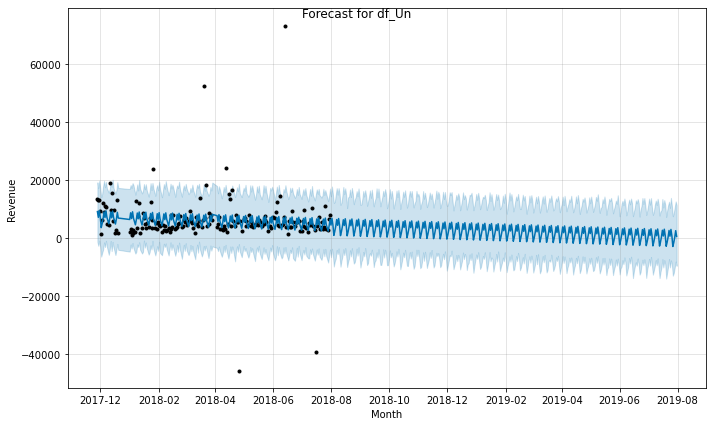

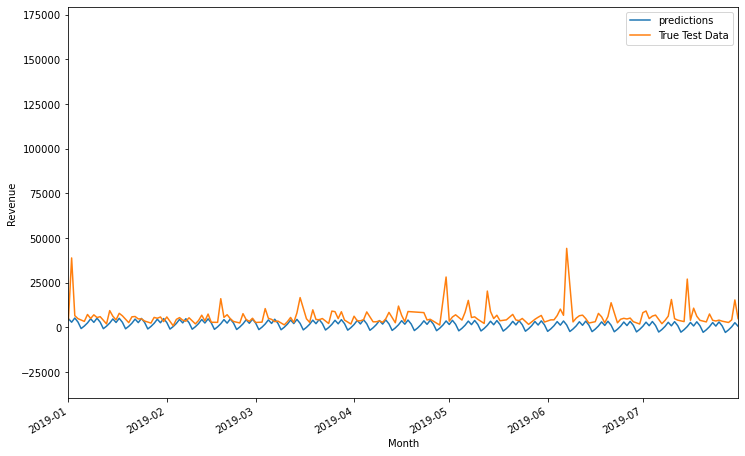

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


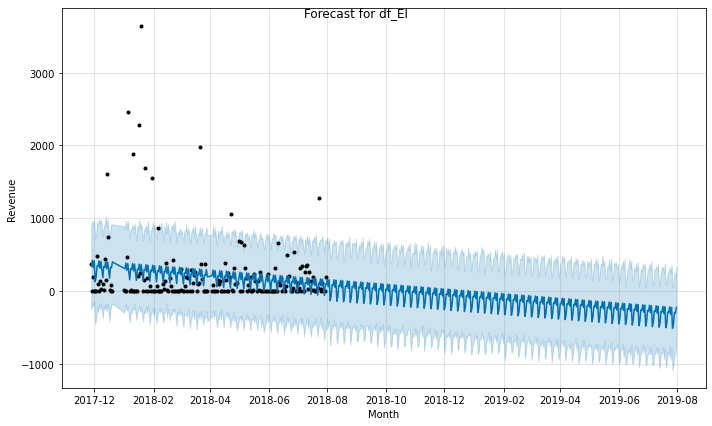

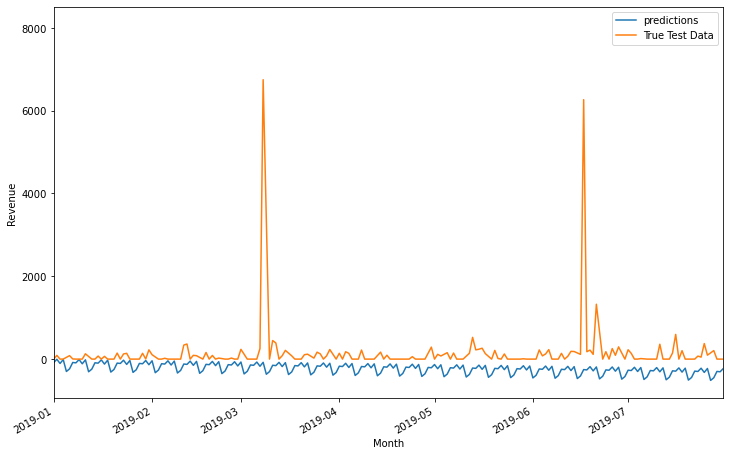

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


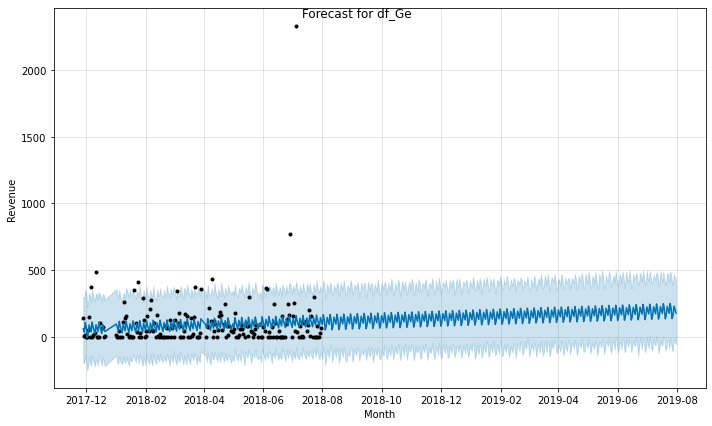

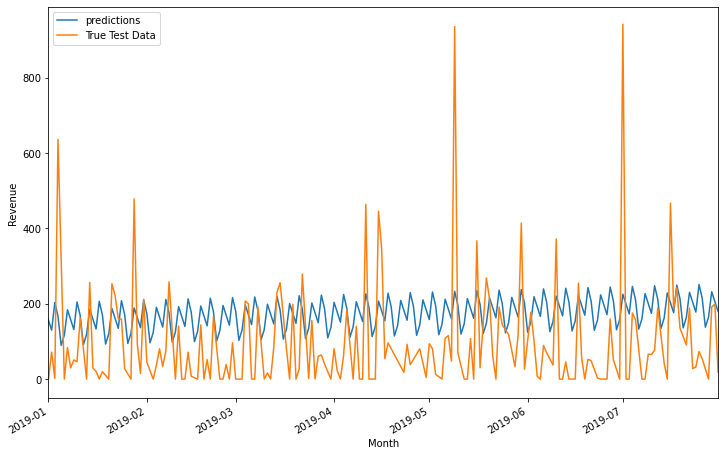

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


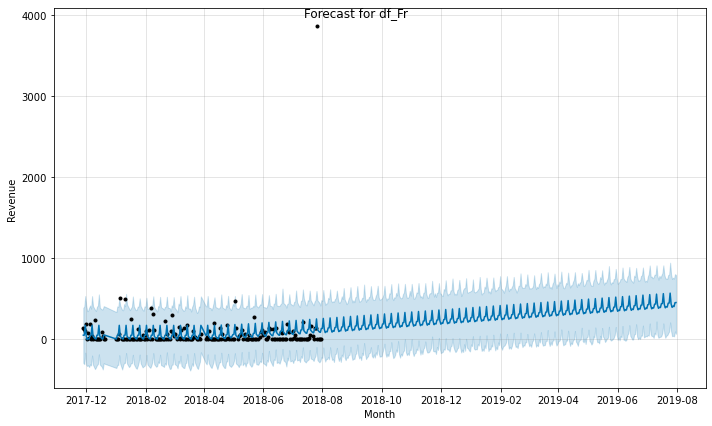

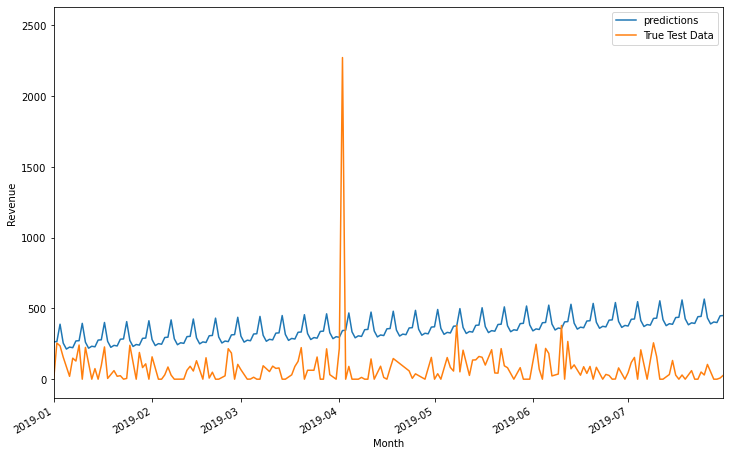

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


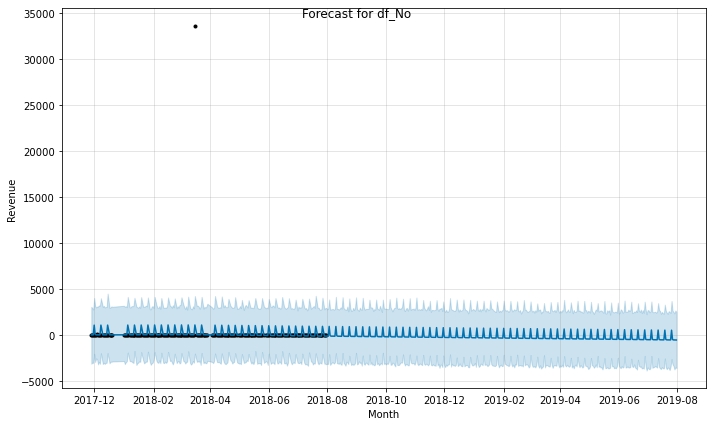

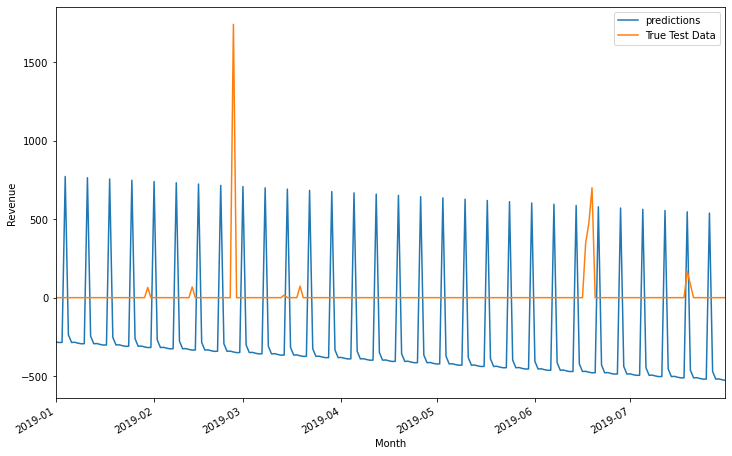

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


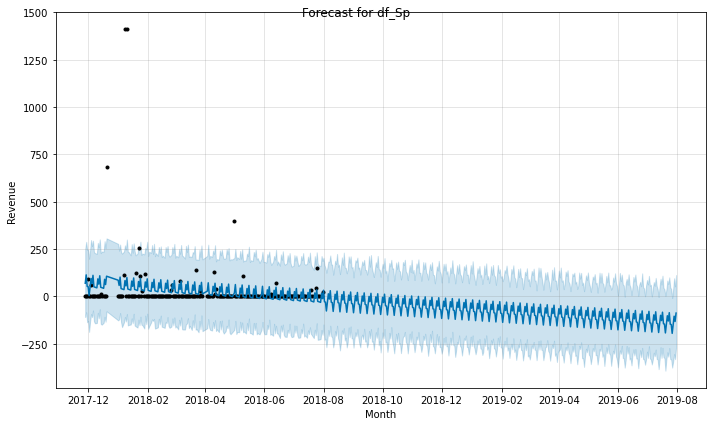

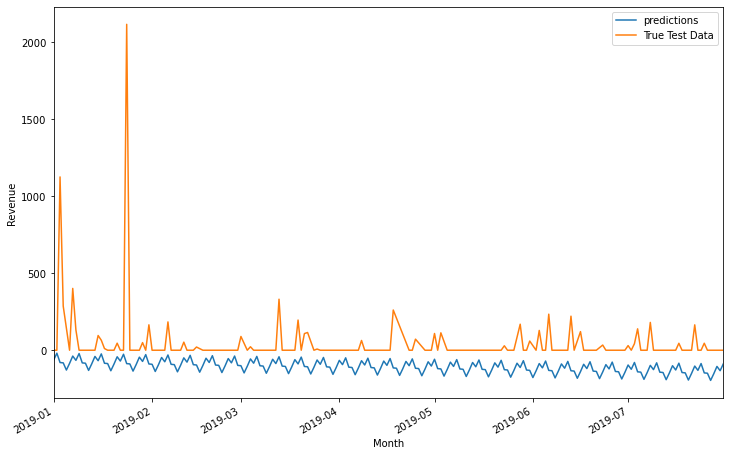

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


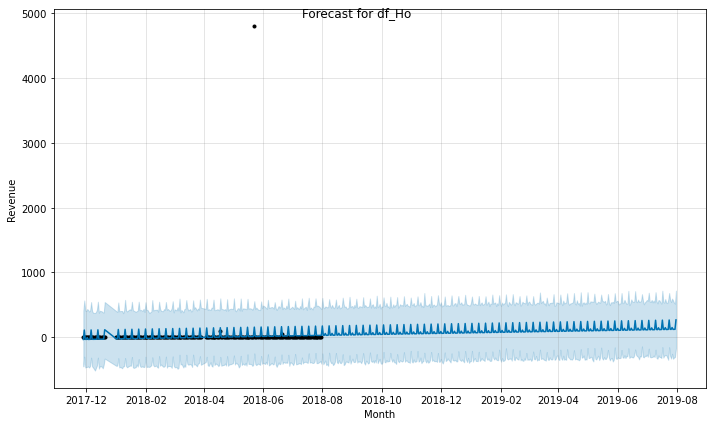

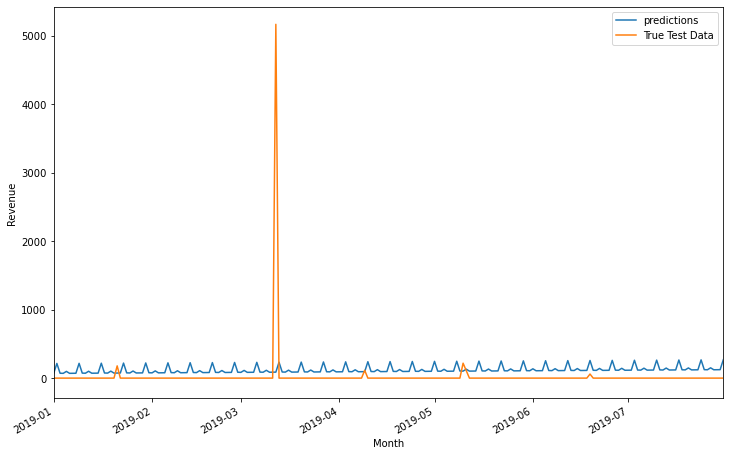

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


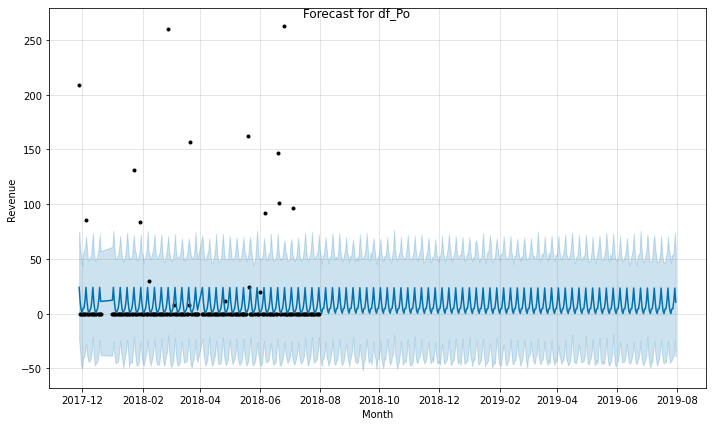

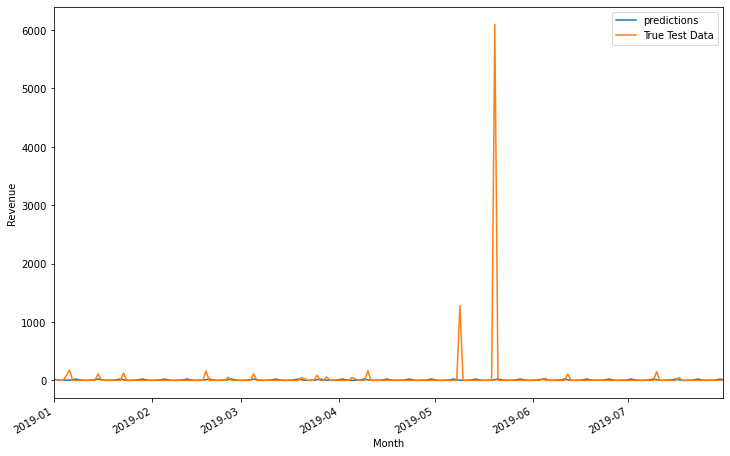

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


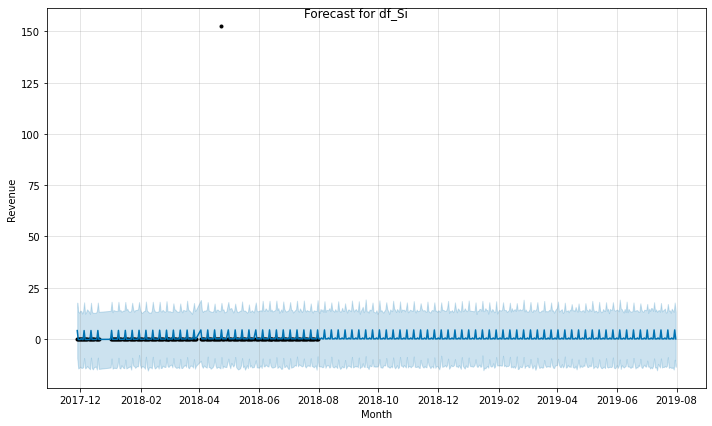

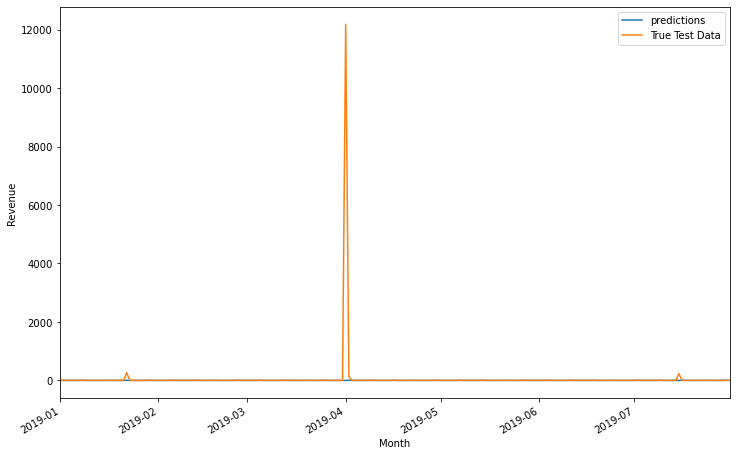

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


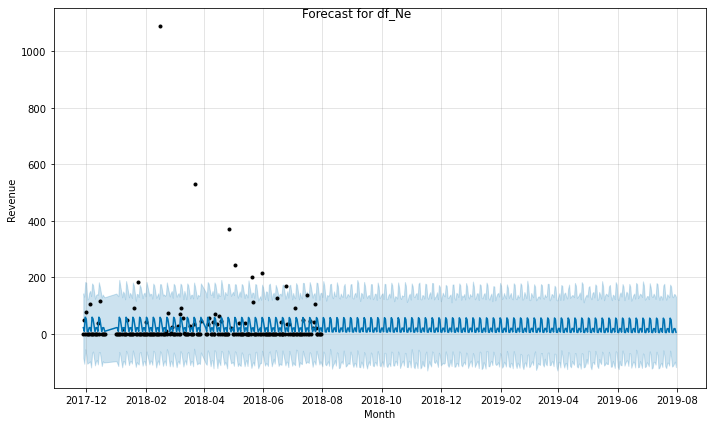

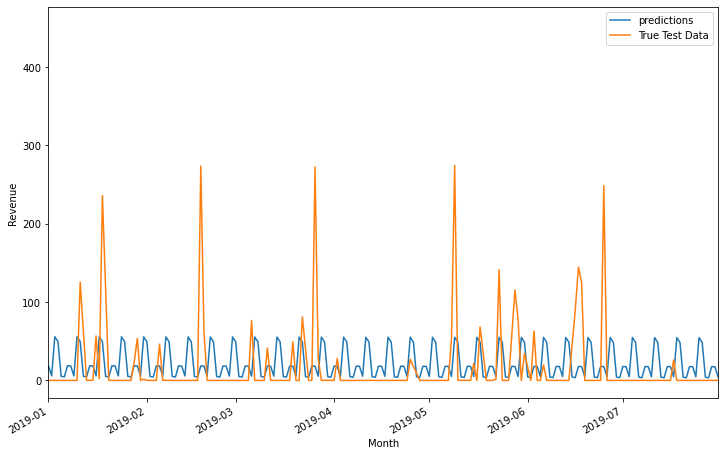

In [24]:
#repeat train-test-split and model building and forecasting for base model B

predictions = {}

for dfname, df in df_individual_countries.items():
    train = df[df['ds'] <= '2018-07-31']
    test = df[df['ds'] >= '2018-08-01']
    model = Prophet()
    model.fit(train)
    future = model.make_future_dataframe(periods=365)
    prediction = model.predict(future)
    predictions[dfname] = prediction
    forecast = model.plot(prediction)
    forecast.suptitle('Forecast for ' + str(dfname))
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()
    ax = prediction.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    predictionsvstestdata = test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2019-01-01','2019-07-31'))
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()

In [71]:
#repeat generation of evaluation metric for base model B
for dfname, pred in predictions.items():
    pred = pred[pred['ds'] >= '2018-08-01']
    pred_merged = pd.merge(right=df_individual_countries[dfname][['ds', 'y']], left=pred, how='left', on='ds')
    pred_merged['y'].fillna(0, inplace=True)
    pred_merged['error'] = pred_merged['y'] - pred_merged['yhat']
    print(str(dfname) + ' predictions MAE = ' + str(np.mean(abs(pred_merged['error']))))

df_Un predictions MAE = 4661.961802454494
df_EI predictions MAE = 338.1204744271503
df_Ge predictions MAE = 116.97534957433712
df_Fr predictions MAE = 246.2547425939945
df_No predictions MAE = 379.22475041382216
df_Sp predictions MAE = 108.81950782909101
df_Ho predictions MAE = 124.6056595994223
df_Po predictions MAE = 37.82349611212067
df_Si predictions MAE = 36.40249521635093
df_Ne predictions MAE = 32.45871471868323


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


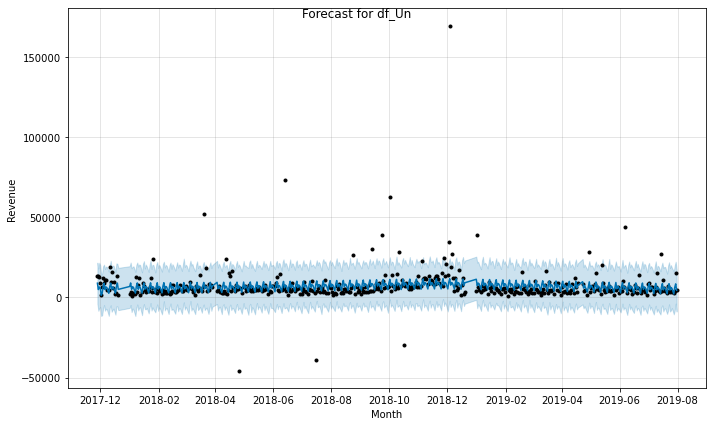

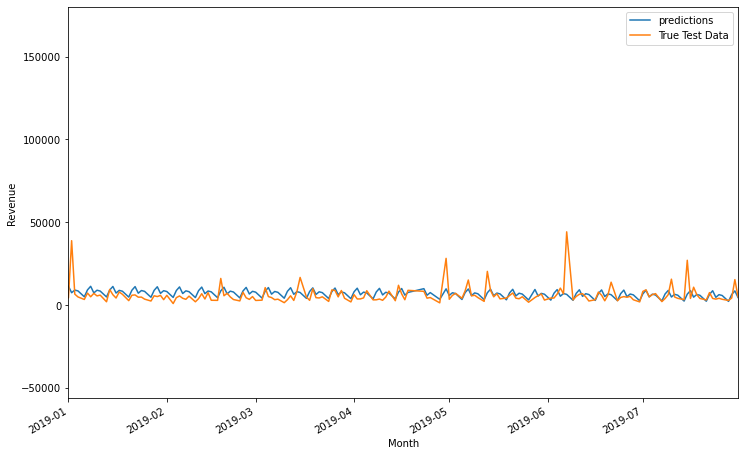

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


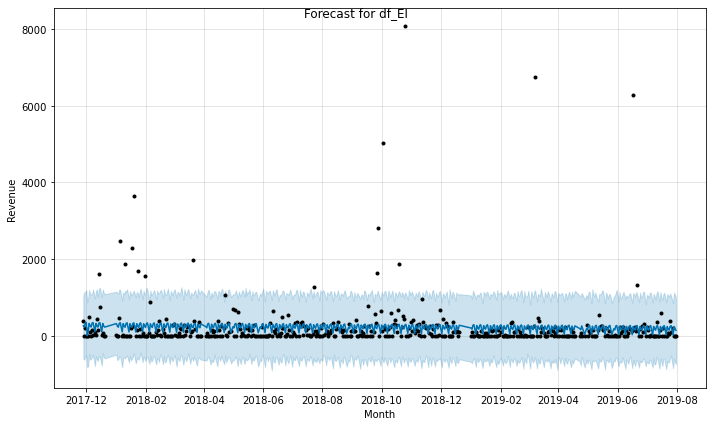

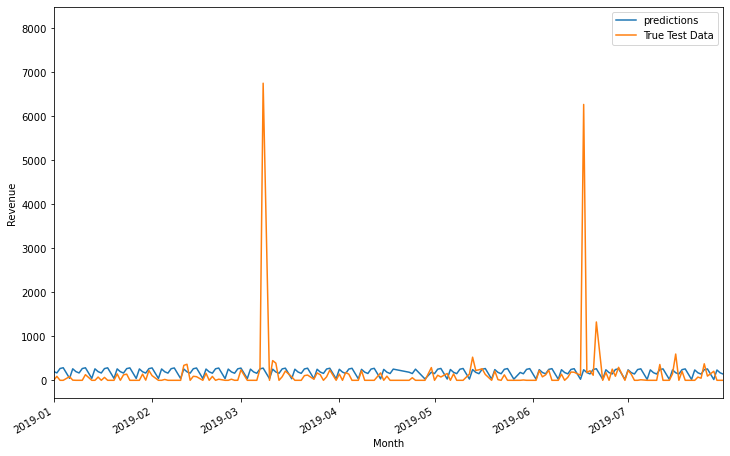

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


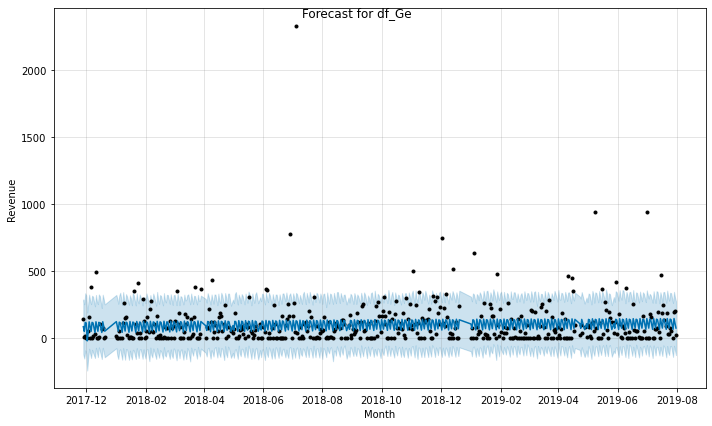

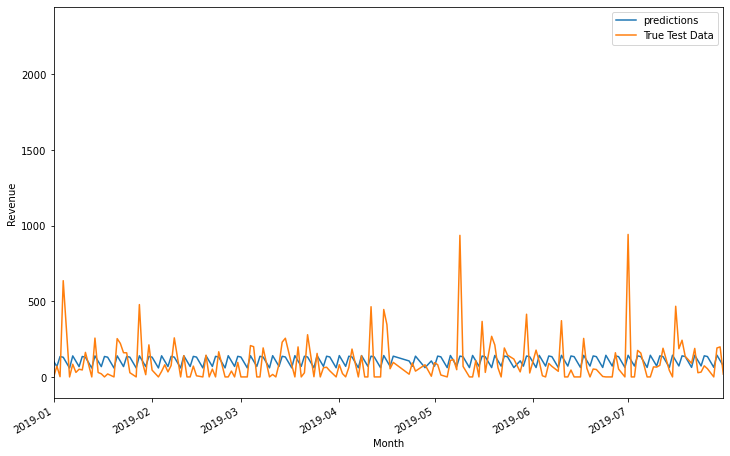

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


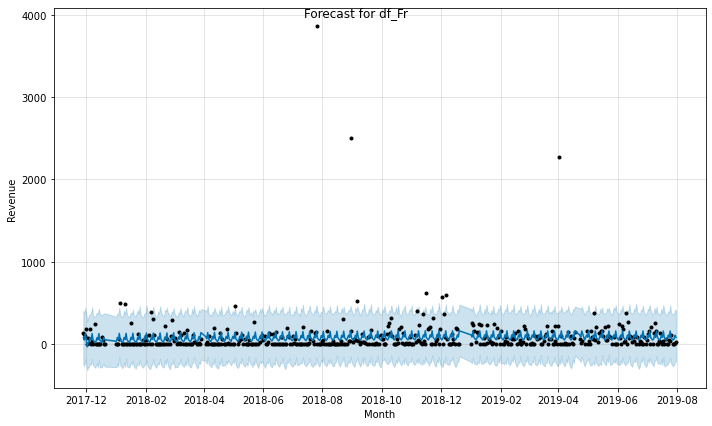

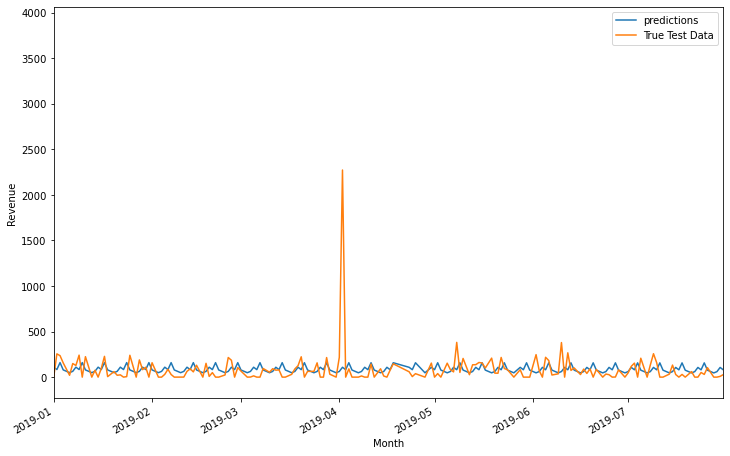

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


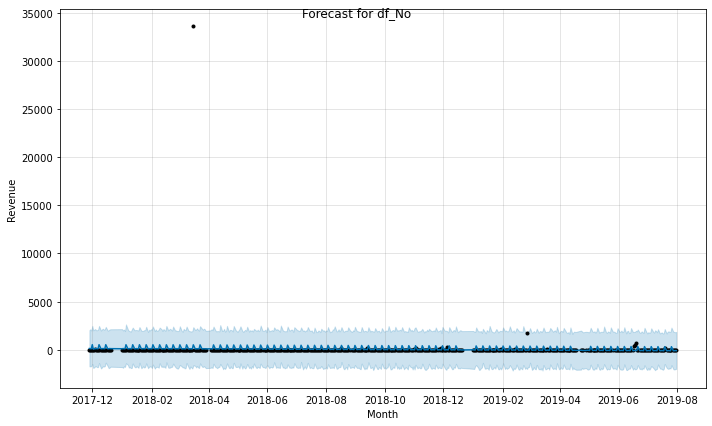

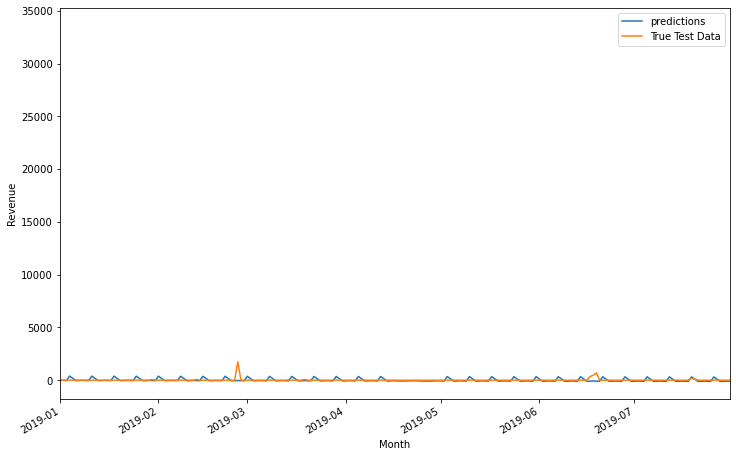

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


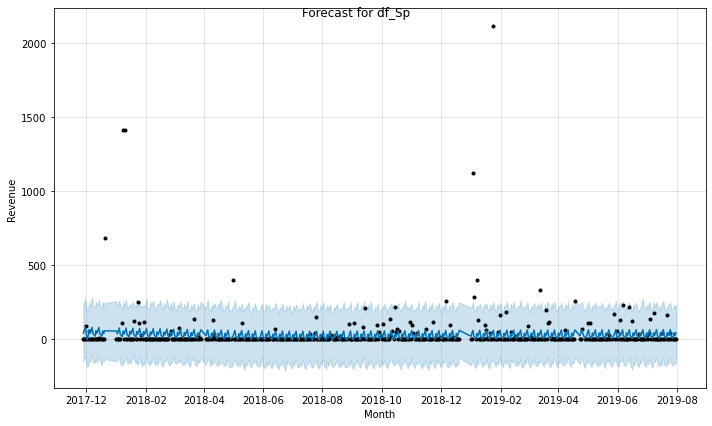

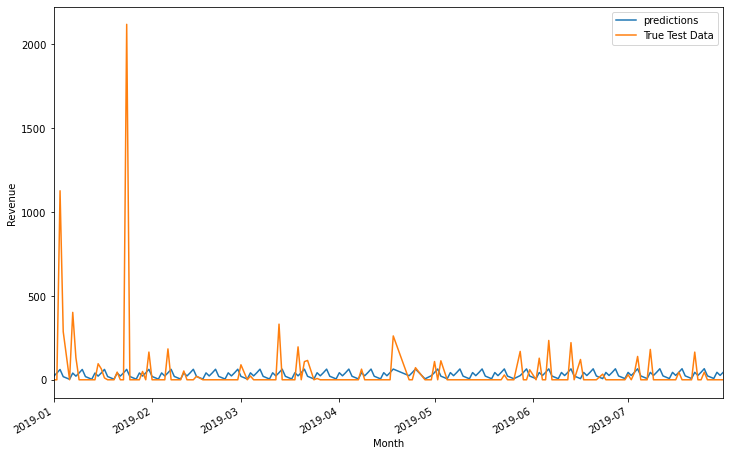

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


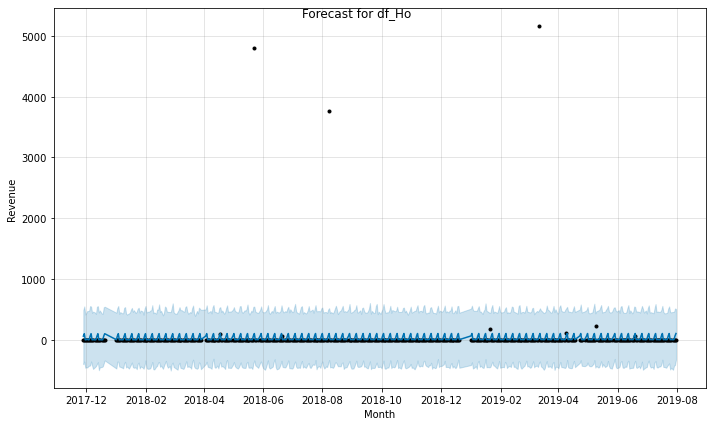

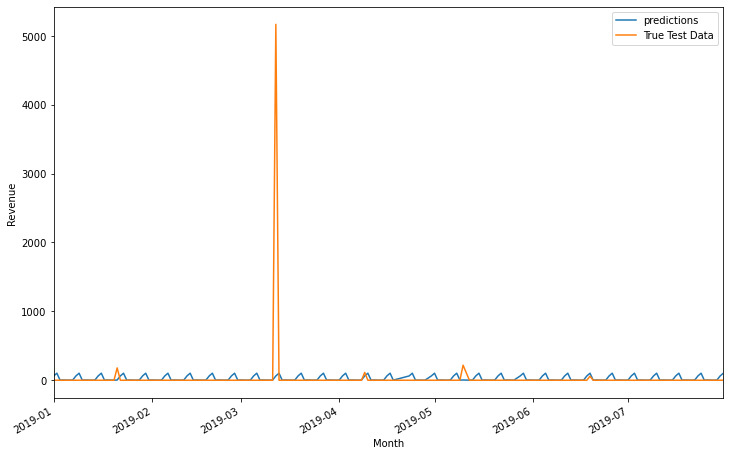

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


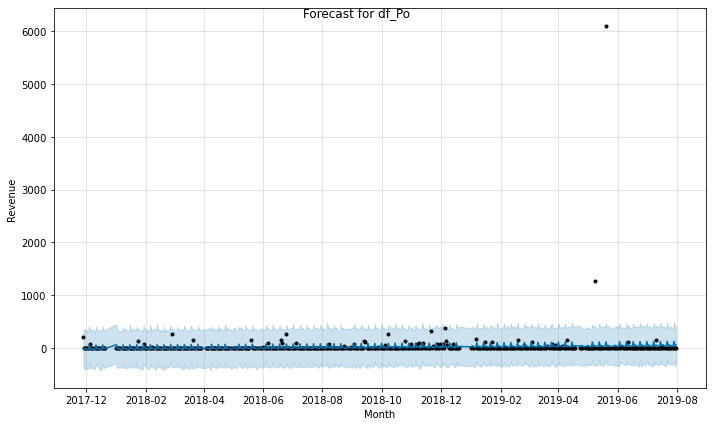

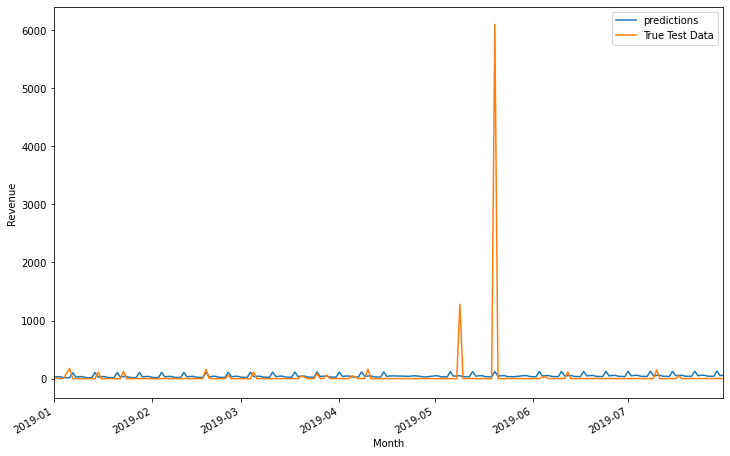

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


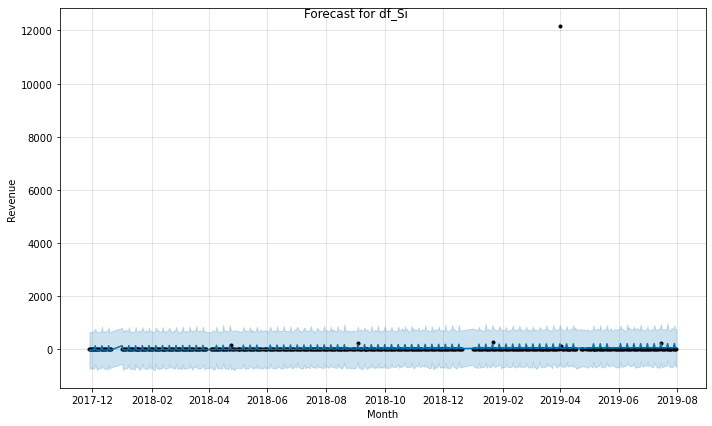

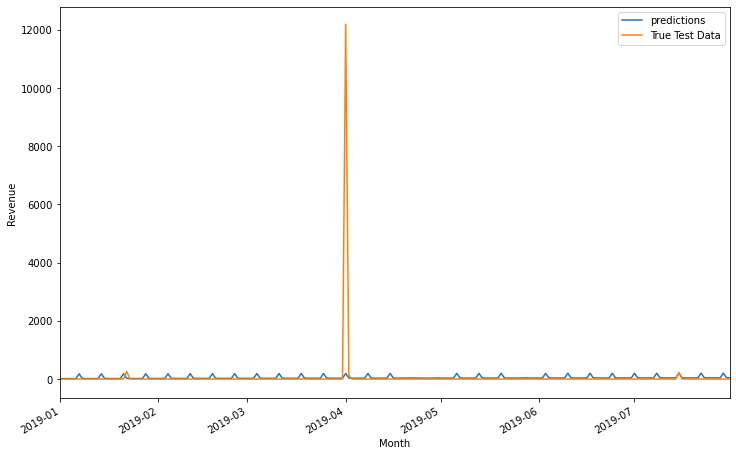

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


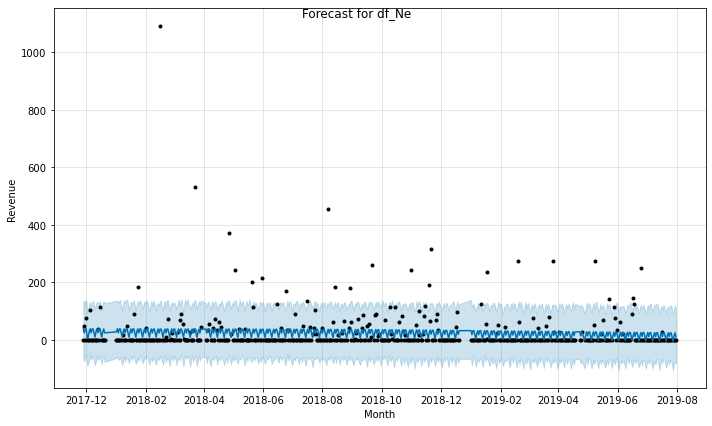

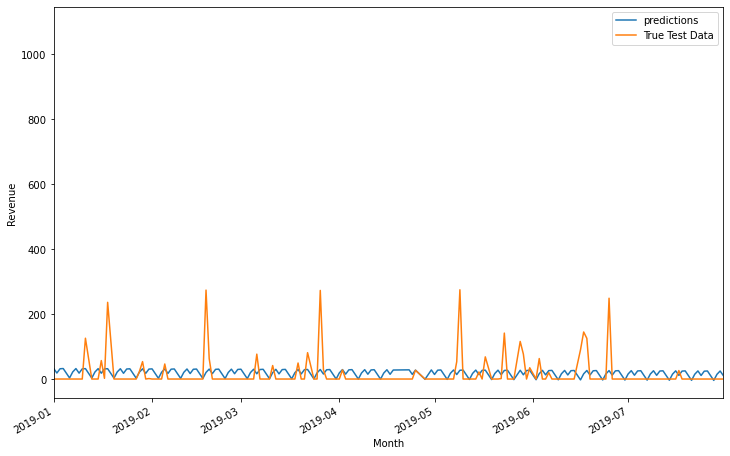

In [25]:
#repeat train-test-split and model building and forecasting for base model C
predictions = {}

for dfname, df in df_individual_countries.items():
    train = df
    test = df
    model = Prophet()
    model.fit(train)
    prediction = model.predict(test)
    predictions[dfname] = prediction
    forecast = model.plot(prediction)
    forecast.suptitle('Forecast for ' + str(dfname))
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()
    ax = prediction.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    predictionsvstestdata = test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2019-01-01','2019-07-31'))
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.show()

In [73]:
#repeat generation of evaluation metric for base model C
for dfname, pred in predictions.items():
    #pred = pred[pred['ds'] >= '']
    pred_merged = pd.merge(right=df_individual_countries[dfname][['ds', 'y']], left=pred, how='left', on='ds')
    pred_merged['y'].fillna(0, inplace=True)
    pred_merged['error'] = pred_merged['y'] - pred_merged['yhat']
    print(str(dfname) + ' predictions MAE = ' + str(np.mean(abs(pred_merged['error']))))

df_Un predictions MAE = 4230.78915447646
df_EI predictions MAE = 255.59461082714478
df_Ge predictions MAE = 90.96439311345458
df_Fr predictions MAE = 93.4475567743228
df_No predictions MAE = 190.90860648576725
df_Sp predictions MAE = 52.18399069031502
df_Ho predictions MAE = 56.73451430456676
df_Po predictions MAE = 52.14758804946802
df_Si predictions MAE = 68.72812949646831
df_Ne predictions MAE = 36.29589621871199


In [ ]:
#initially select base model C as it has lowest sum of MAE across the 10 countries

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


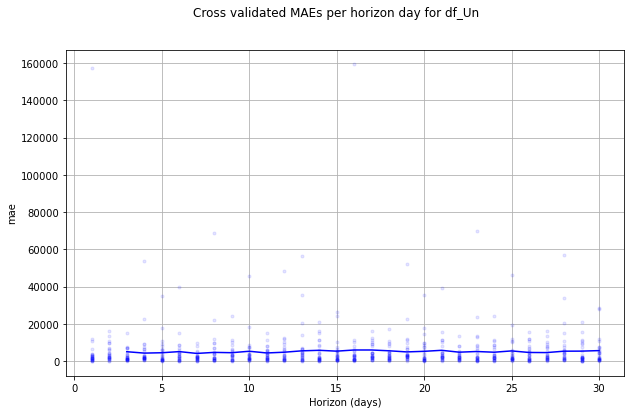

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


df_Un cross validated MAE = 5032.186975162721


INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


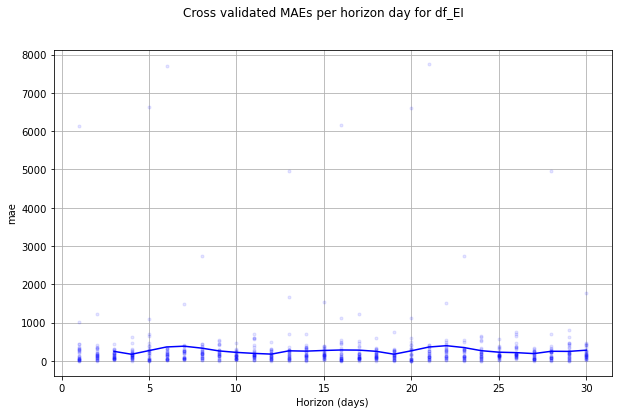

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


df_EI cross validated MAE = 268.6696248666919


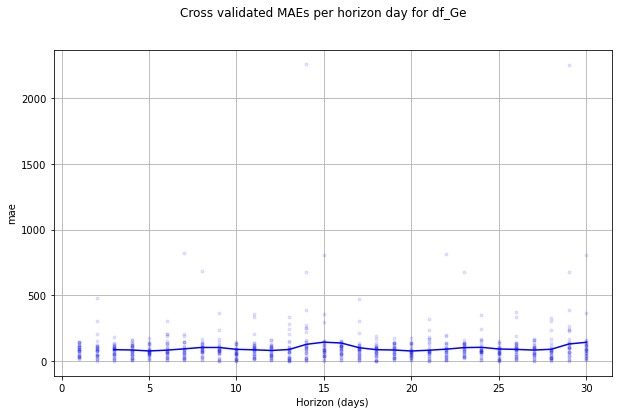

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


df_Ge cross validated MAE = 97.21761575526837


INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


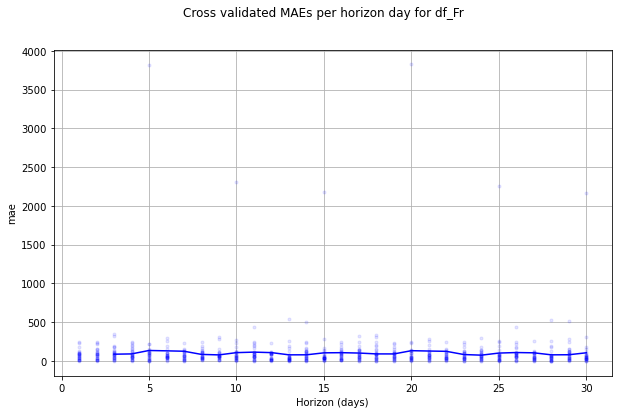

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


df_Fr cross validated MAE = 101.51213427209096


INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


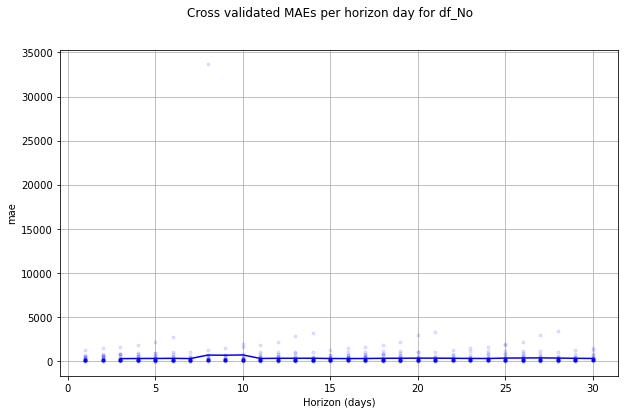

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


df_No cross validated MAE = 344.3208464342487


INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


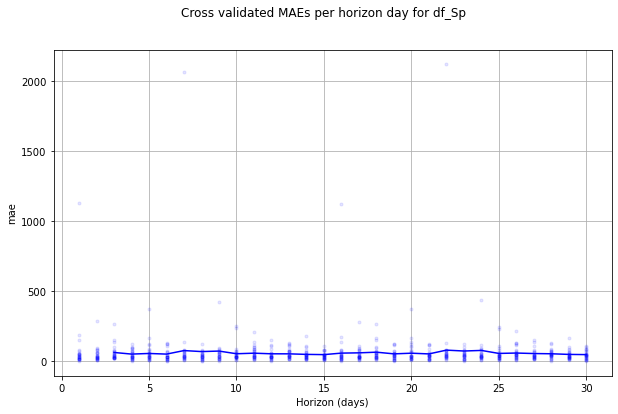

INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


df_Sp cross validated MAE = 57.05393504229398


INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


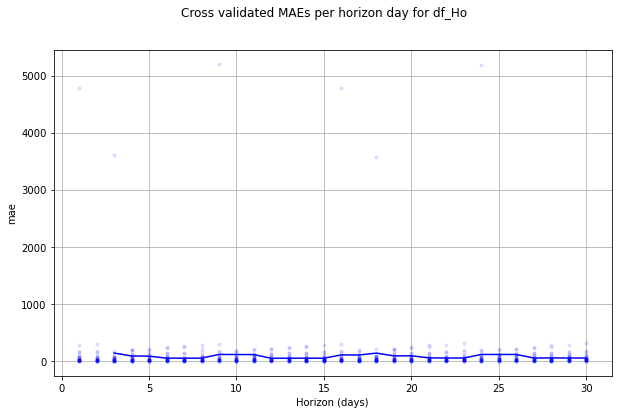

INFO:prophet:Skipping MAPE because y close to 0


AssertionError: 

In [98]:
#cross-validation of model C starting

for dfname, df in df_individual_countries.items():
    model = Prophet()
    model.fit(df)
    cv = cross_validation(model, horizon = '30 days')
    cvplot =  plot_cross_validation_metric(cv,'mae');
    cvplot.suptitle('Cross validated MAEs per horizon day for ' + str(dfname))
    plt.show()
    print(str(dfname) + ' cross validated MAE = ' + str(performance_metrics(cv)['mae'].mean()))
    

In [ ]:
#I tried to figure out the AssertionError above, but couldn't do it so Iwon't have the mean MAE for all Hong Kong forecasts
#but from the graph it looks to be below 200, which is in line with other countries

#below, plotting the cross validated MAEs for the remaining countries Portugal, Singapore, Netherlands:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


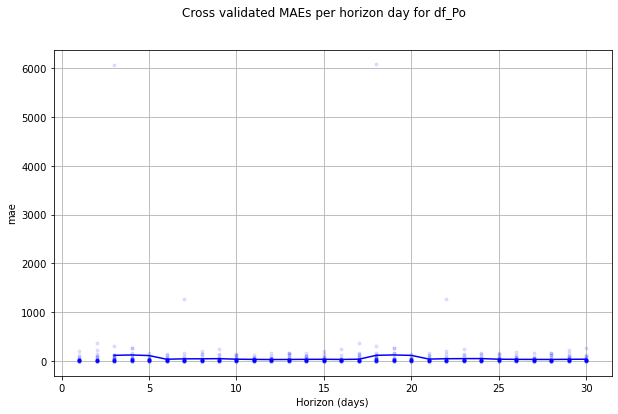

INFO:prophet:Skipping MAPE because y close to 0


['df_Po'] cross validated MAE = 54.51987981883492


In [134]:
#Portugal
dfname = 'df_Po'

model = Prophet()
model.fit(df_individual_countries[dfname])
cv = cross_validation(model, horizon = '30 days')
cvplot =  plot_cross_validation_metric(cv,'mae');
cvplot.suptitle('Cross validated MAEs per horizon day for ' + str(dfname))
plt.show()
print(str([dfname]) + ' cross validated MAE = ' + str(performance_metrics(cv)['mae'].mean()))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


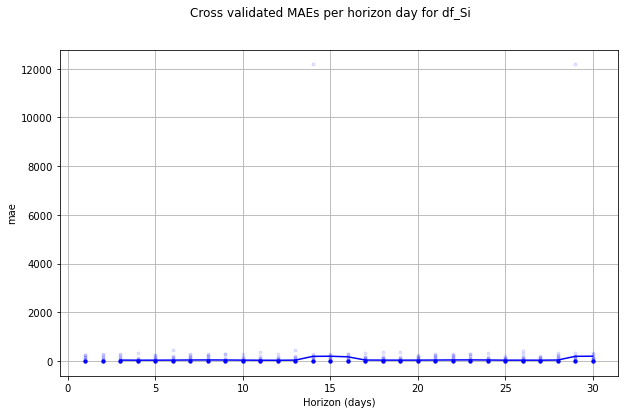

INFO:prophet:Skipping MAPE because y close to 0


AssertionError: 

In [137]:
#Singapore
dfname = 'df_Si'

model = Prophet()
model.fit(df_individual_countries[dfname])
cv = cross_validation(model, horizon = '30 days')
cvplot =  plot_cross_validation_metric(cv,'mae');
cvplot.suptitle('Cross validated MAEs per horizon day for ' + str(dfname))
plt.show()
print(str([dfname]) + ' cross validated MAE = ' + str(performance_metrics(cv)['mae'].mean()))

In [ ]:
#same assertion error as Hong Kong for Singapore :(

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 33 forecasts with cutoffs between 2018-03-08 00:00:00 and 2019-07-01 00:00:00


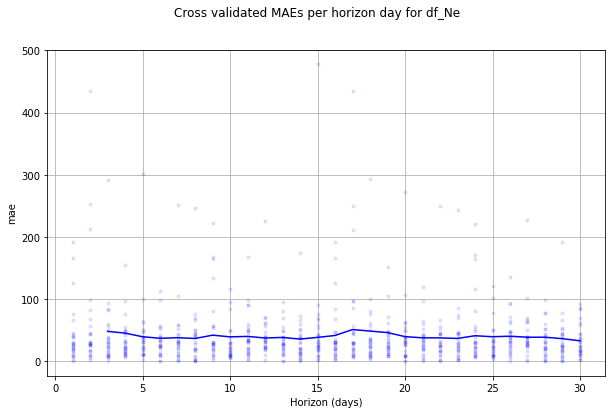

INFO:prophet:Skipping MAPE because y close to 0


['df_Ne'] cross validated MAE = 40.27045703725686


In [136]:
#Netherlands
dfname = 'df_Ne'

model = Prophet()
model.fit(df_individual_countries[dfname])
cv = cross_validation(model, horizon = '30 days')
cvplot =  plot_cross_validation_metric(cv,'mae');
cvplot.suptitle('Cross validated MAEs per horizon day for ' + str(dfname))
plt.show()
print(str([dfname]) + ' cross validated MAE = ' + str(performance_metrics(cv)['mae'].mean()))

In [ ]:
#average MAEs for each country are similar to MAEs from base model C

#selecting base model C for deployment

In [ ]:
#END MODEL BUILDING

In [35]:
#retrain and save base model C for each country

for dfname, df in df_individual_countries.items():
    model = Prophet()
    model.fit(df)
    
    modelname = 'model_' + str(dfname) + '.json'
    
    with open('serialized_model.json', 'w') as fout:
        modeltosave = model_to_json(model)
        project.save_data(data = modeltosave, file_name = modelname, overwrite=True)
        print('saved ' + modelname)   

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2021-04-01 17:00:04,256 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-01 17:00:04,257 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:04,906 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:04,907 - __PROJECT_LIB__ - INFO - POST http

saved model_df_Un.json


2021-04-01 17:00:06,421 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:06,422 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:06,776 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_attachment(): sending request to add attachment.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_attachment(): sending request to add attachment.
2021-04-01 17:00:06,781 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/edee6e0b-eff7-44e3-aae5-fa5ff19c2ed8/attachments?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/ede

saved model_df_EI.json


2021-04-01 17:00:07,814 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:07,822 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:08,298 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_attachment(): sending request to add attachment.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_attachment(): sending request to add attachment.
2021-04-01 17:00:08,301 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/bfabd002-d240-4ed0-85c6-2375a178b2a5/attachments?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/bfa

saved model_df_Ge.json


INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-01 17:00:09,630 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:10,119 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:10,120 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:10,582 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_attachment

saved model_df_Fr.json


INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-01 17:00:11,575 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:11,941 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:11,943 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:12,299 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_attachment

saved model_df_No.json


2021-04-01 17:00:13,048 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-01 17:00:13,049 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:13,410 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:13,411 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1

saved model_df_Sp.json


2021-04-01 17:00:14,872 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:14,873 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:15,254 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_attachment(): sending request to add attachment.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_attachment(): sending request to add attachment.
2021-04-01 17:00:15,255 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/30cb64c2-bf81-4ad0-8532-d1e0a16dedc9/attachments?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/30c

saved model_df_Ho.json


2021-04-01 17:00:15,901 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-01 17:00:15,902 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:16,264 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:16,265 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1

saved model_df_Po.json


2021-04-01 17:00:18,087 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:18,089 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:18,458 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_attachment(): sending request to add attachment.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_attachment(): sending request to add attachment.
2021-04-01 17:00:18,460 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/ceec29ed-cbca-4b5f-84f4-2ee9ea64da11/attachments?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/cee

saved model_df_Si.json


2021-04-01 17:00:19,140 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-01 17:00:19,141 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-01 17:00:19,469 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__add_data_asset(): sending request to add asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__add_data_asset(): sending request to add asset.
2021-04-01 17:00:19,482 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/data_assets?project_id=1

saved model_df_Ne.json


In [89]:
#loading model function

#for the given country
    #load its json model from project file
    #convert json to a Prophet model
    #return the model
    
def load_model(country):
    
    countrydfnamemapping = {
        'United Kingdom' : 'df_Un',
        'Ireland' : 'df_EI',
        'Germany' : 'df_Ge',
        'France' : 'df_Fr',
        'Norway' : 'df_No',
        'Spain' : 'df_Sp',
        'Hong Kong' : 'df_Ho',
        'Portugal' : 'df_Po',
        'Singapore' : 'df_Si',
        'Netherlands' : 'df_Ne'
    }
    
    dfname = countrydfnamemapping[country]
    jsonmodelname = 'model_' + dfname + '.json'
    jsonmodel = project.get_file(jsonmodelname).getvalue()
    loadedmodel = model_from_json(jsonmodel)
    
    return loadedmodel



2021-04-02 16:48:53,659 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:48:53,674 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:48:53,955 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:48:53,957 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/2b391bfb-4b5f-4612-a855-d7bd4edc9305?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

United Kingdom forecast:

            ds         yhat
495 2019-08-01  6081.293699
496 2019-08-02  5566.881407
497 2019-08-03   868.794879
498 2019-08-04  2011.854564
499 2019-08-05  6178.722472
500 2019-08-06  8353.390392
501 2019-08-07  4372.239081
502 2019-08-08  5985.620186
503 2019-08-09  5471.207895
504 2019-08-10   773.121366
505 2019-08-11  1916.181051
506 2019-08-12  6083.048959
507 2019-08-13  8257.716879
508 2019-08-14  4276.565568
509 2019-08-15  5889.946673
510 2019-08-16  5375.534382
511 2019-08-17   677.447853
512 2019-08-18  1820.507538
513 2019-08-19  5987.375446
514 2019-08-20  8162.043366
515 2019-08-21  4180.892055
516 2019-08-22  5794.273160
517 2019-08-23  5279.860869
518 2019-08-24   581.774340
519 2019-08-25  1724.834025
520 2019-08-26  5891.701934
521 2019-08-27  8066.369853
522 2019-08-28  4085.218542
523 2019-08-29  5698.599647
524 2019-08-30  5184.187356
United Kingdom monthly , and weekly trends:


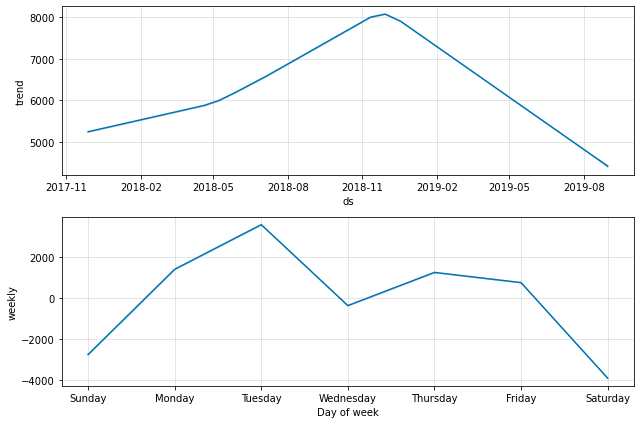

2021-04-02 16:48:56,544 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:48:56,545 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:48:56,835 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:48:56,850 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/edee6e0b-eff7-44e3-aae5-fa5ff19c2ed8?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

Ireland forecast:

            ds        yhat
495 2019-08-01  240.224395
496 2019-08-02  257.271167
497 2019-08-03  -87.170352
498 2019-08-04   17.158708
499 2019-08-05  233.357914
500 2019-08-06  169.401621
501 2019-08-07  139.088828
502 2019-08-08  239.289285
503 2019-08-09  256.336057
504 2019-08-10  -88.105463
505 2019-08-11   16.223597
506 2019-08-12  232.422804
507 2019-08-13  168.466510
508 2019-08-14  138.153718
509 2019-08-15  238.354174
510 2019-08-16  255.400946
511 2019-08-17  -89.040573
512 2019-08-18   15.288487
513 2019-08-19  231.487694
514 2019-08-20  167.531400
515 2019-08-21  137.218607
516 2019-08-22  237.419064
517 2019-08-23  254.465836
518 2019-08-24  -89.975684
519 2019-08-25   14.353377
520 2019-08-26  230.552583
521 2019-08-27  166.596289
522 2019-08-28  136.283497
523 2019-08-29  236.483953
524 2019-08-30  253.530725
Ireland monthly , and weekly trends:


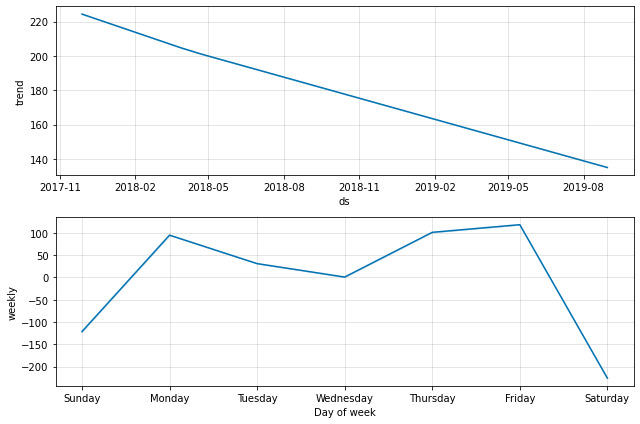

2021-04-02 16:48:59,430 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:48:59,435 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:48:59,708 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:48:59,710 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/bfabd002-d240-4ed0-85c6-2375a178b2a5?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

Germany forecast:

            ds        yhat
495 2019-08-01  139.609276
496 2019-08-02  134.829341
497 2019-08-03    1.777028
498 2019-08-04   63.407349
499 2019-08-05  143.803965
500 2019-08-06  107.840834
501 2019-08-07   72.865433
502 2019-08-08  139.770134
503 2019-08-09  134.990200
504 2019-08-10    1.937887
505 2019-08-11   63.568207
506 2019-08-12  143.964823
507 2019-08-13  108.001692
508 2019-08-14   73.026291
509 2019-08-15  139.930993
510 2019-08-16  135.151058
511 2019-08-17    2.098745
512 2019-08-18   63.729065
513 2019-08-19  144.125681
514 2019-08-20  108.162550
515 2019-08-21   73.187149
516 2019-08-22  140.091851
517 2019-08-23  135.311916
518 2019-08-24    2.259603
519 2019-08-25   63.889924
520 2019-08-26  144.286539
521 2019-08-27  108.323409
522 2019-08-28   73.348008
523 2019-08-29  140.252709
524 2019-08-30  135.472774
Germany monthly , and weekly trends:


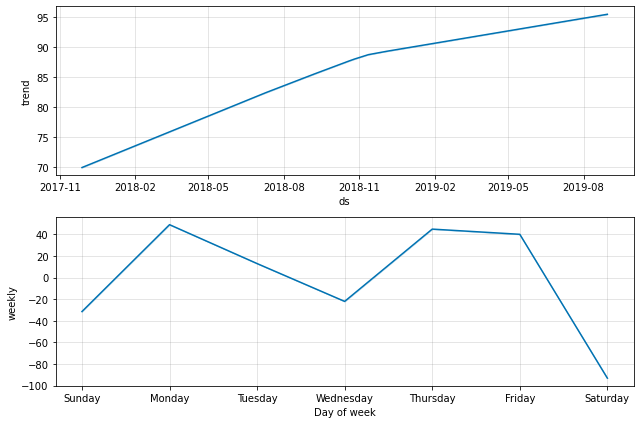

2021-04-02 16:49:02,432 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:49:02,433 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:49:02,822 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:49:02,830 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/8b173a1d-293b-46ce-b706-9156eb35c4d4?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

France forecast:

            ds        yhat
495 2019-08-01  156.219738
496 2019-08-02   76.030471
497 2019-08-03   -4.056368
498 2019-08-04   46.023512
499 2019-08-05   60.260031
500 2019-08-06  106.107096
501 2019-08-07   79.876065
502 2019-08-08  156.108697
503 2019-08-09   75.919430
504 2019-08-10   -4.167409
505 2019-08-11   45.912470
506 2019-08-12   60.148990
507 2019-08-13  105.996055
508 2019-08-14   79.765024
509 2019-08-15  155.997656
510 2019-08-16   75.808389
511 2019-08-17   -4.278450
512 2019-08-18   45.801429
513 2019-08-19   60.037949
514 2019-08-20  105.885014
515 2019-08-21   79.653983
516 2019-08-22  155.886615
517 2019-08-23   75.697348
518 2019-08-24   -4.389491
519 2019-08-25   45.690388
520 2019-08-26   59.926908
521 2019-08-27  105.773973
522 2019-08-28   79.542942
523 2019-08-29  155.775574
524 2019-08-30   75.586307
France monthly , and weekly trends:


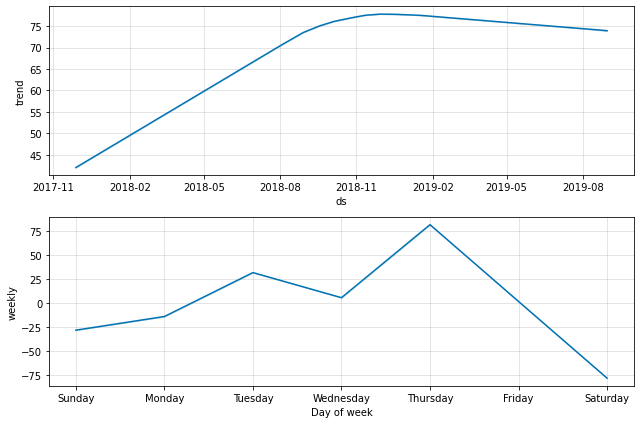

2021-04-02 16:49:05,542 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:49:05,544 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:49:05,998 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:49:06,010 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/8052c5c7-a9d3-47a6-90cf-2968da4db9ac?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

Norway forecast:

            ds        yhat
495 2019-08-01 -113.822483
496 2019-08-02  309.875869
497 2019-08-03 -158.736814
498 2019-08-04 -116.061204
499 2019-08-05 -111.010210
500 2019-08-06  -91.470012
501 2019-08-07 -102.107180
502 2019-08-08 -116.522679
503 2019-08-09  307.175674
504 2019-08-10 -161.437010
505 2019-08-11 -118.761399
506 2019-08-12 -113.710405
507 2019-08-13  -94.170207
508 2019-08-14 -104.807376
509 2019-08-15 -119.222874
510 2019-08-16  304.475478
511 2019-08-17 -164.137205
512 2019-08-18 -121.461595
513 2019-08-19 -116.410601
514 2019-08-20  -96.870402
515 2019-08-21 -107.507571
516 2019-08-22 -121.923070
517 2019-08-23  301.775283
518 2019-08-24 -166.837401
519 2019-08-25 -124.161790
520 2019-08-26 -119.110796
521 2019-08-27  -99.570598
522 2019-08-28 -110.207767
523 2019-08-29 -124.623265
524 2019-08-30  299.075087
Norway monthly , and weekly trends:


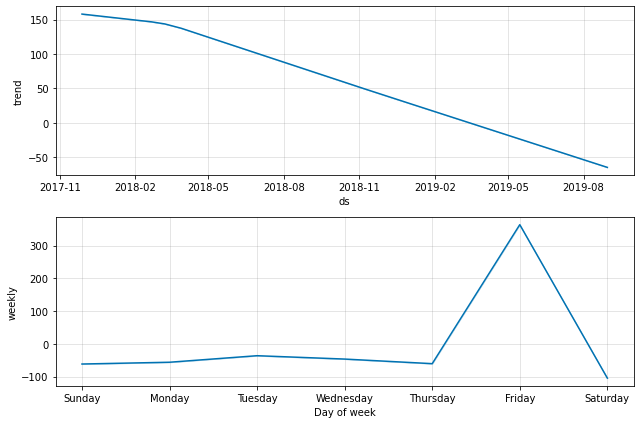

2021-04-02 16:49:08,603 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:49:08,607 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:49:08,856 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:49:08,857 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/4f929ff8-39d0-4fbe-99cf-de9792cfec73?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

Spain forecast:

            ds       yhat
495 2019-08-01  66.136083
496 2019-08-02  23.534700
497 2019-08-03 -18.433939
498 2019-08-04   7.759632
499 2019-08-05  44.660075
500 2019-08-06  26.331966
501 2019-08-07  45.203917
502 2019-08-08  66.284021
503 2019-08-09  23.682638
504 2019-08-10 -18.286000
505 2019-08-11   7.907570
506 2019-08-12  44.808014
507 2019-08-13  26.479905
508 2019-08-14  45.351855
509 2019-08-15  66.431960
510 2019-08-16  23.830577
511 2019-08-17 -18.138061
512 2019-08-18   8.055509
513 2019-08-19  44.955953
514 2019-08-20  26.627843
515 2019-08-21  45.499794
516 2019-08-22  66.579899
517 2019-08-23  23.978516
518 2019-08-24 -17.990123
519 2019-08-25   8.203448
520 2019-08-26  45.103891
521 2019-08-27  26.775782
522 2019-08-28  45.647733
523 2019-08-29  66.727837
524 2019-08-30  24.126454
Spain monthly , and weekly trends:


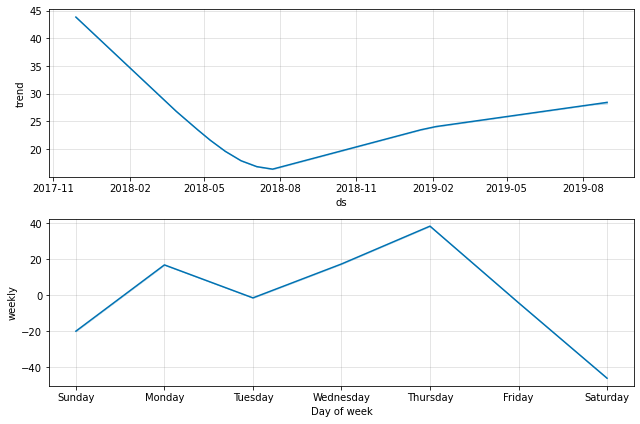

2021-04-02 16:49:11,557 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:49:11,558 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:49:11,879 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:49:11,891 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/30cb64c2-bf81-4ad0-8532-d1e0a16dedc9?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

Hong Kong forecast:

            ds        yhat
495 2019-08-01    1.390333
496 2019-08-02    3.473022
497 2019-08-03   14.157024
498 2019-08-04    0.745009
499 2019-08-05    3.106133
500 2019-08-06   62.019184
501 2019-08-07  101.908473
502 2019-08-08    1.383276
503 2019-08-09    3.465965
504 2019-08-10   14.149967
505 2019-08-11    0.737952
506 2019-08-12    3.099077
507 2019-08-13   62.012127
508 2019-08-14  101.901416
509 2019-08-15    1.376220
510 2019-08-16    3.458908
511 2019-08-17   14.142910
512 2019-08-18    0.730895
513 2019-08-19    3.092020
514 2019-08-20   62.005070
515 2019-08-21  101.894359
516 2019-08-22    1.369163
517 2019-08-23    3.451852
518 2019-08-24   14.135853
519 2019-08-25    0.723838
520 2019-08-26    3.084963
521 2019-08-27   61.998014
522 2019-08-28  101.887303
523 2019-08-29    1.362106
524 2019-08-30    3.444795
Hong Kong monthly , and weekly trends:


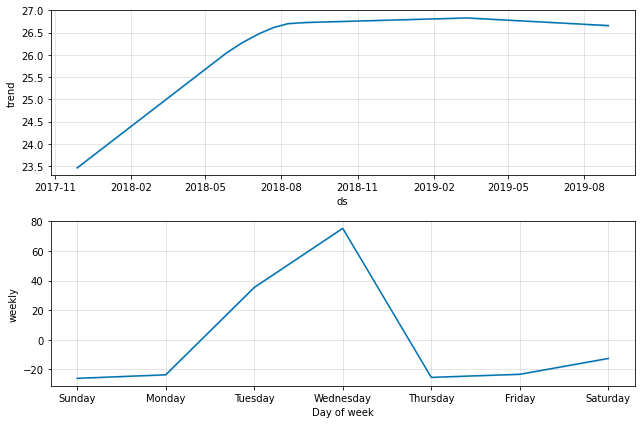

2021-04-02 16:49:14,485 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:49:14,487 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:49:14,776 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:49:14,791 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/196d3268-9b63-4ce7-acc2-66b9e8881fcf?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

Portugal forecast:

            ds        yhat
495 2019-08-01   60.353245
496 2019-08-02   43.847717
497 2019-08-03   38.637015
498 2019-08-04   40.449473
499 2019-08-05  130.495823
500 2019-08-06   52.724386
501 2019-08-07   59.604003
502 2019-08-08   61.221297
503 2019-08-09   44.715769
504 2019-08-10   39.505067
505 2019-08-11   41.317524
506 2019-08-12  131.363875
507 2019-08-13   53.592438
508 2019-08-14   60.472055
509 2019-08-15   62.089348
510 2019-08-16   45.583820
511 2019-08-17   40.373118
512 2019-08-18   42.185576
513 2019-08-19  132.231926
514 2019-08-20   54.460490
515 2019-08-21   61.340107
516 2019-08-22   62.957400
517 2019-08-23   46.451872
518 2019-08-24   41.241170
519 2019-08-25   43.053628
520 2019-08-26  133.099978
521 2019-08-27   55.328542
522 2019-08-28   62.208158
523 2019-08-29   63.825452
524 2019-08-30   47.319924
Portugal monthly , and weekly trends:


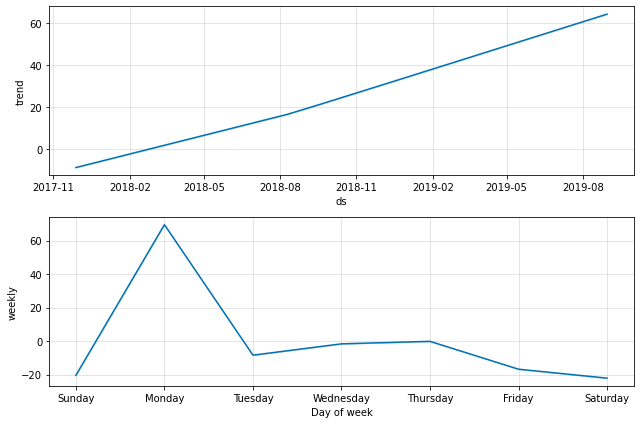

2021-04-02 16:49:17,485 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:49:17,487 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:49:17,723 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:49:17,731 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/ceec29ed-cbca-4b5f-84f4-2ee9ea64da11?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

Singapore forecast:

            ds        yhat
495 2019-08-01   39.679534
496 2019-08-02   40.196590
497 2019-08-03   79.579006
498 2019-08-04   39.709407
499 2019-08-05  204.418998
500 2019-08-06   46.789182
501 2019-08-07   40.420421
502 2019-08-08   40.325323
503 2019-08-09   40.842379
504 2019-08-10   80.224795
505 2019-08-11   40.355196
506 2019-08-12  205.064787
507 2019-08-13   47.434971
508 2019-08-14   41.066210
509 2019-08-15   40.971112
510 2019-08-16   41.488168
511 2019-08-17   80.870584
512 2019-08-18   41.000985
513 2019-08-19  205.710576
514 2019-08-20   48.080761
515 2019-08-21   41.711999
516 2019-08-22   41.616901
517 2019-08-23   42.133957
518 2019-08-24   81.516373
519 2019-08-25   41.646774
520 2019-08-26  206.356366
521 2019-08-27   48.726550
522 2019-08-28   42.357788
523 2019-08-29   42.262690
524 2019-08-30   42.779746
Singapore monthly , and weekly trends:


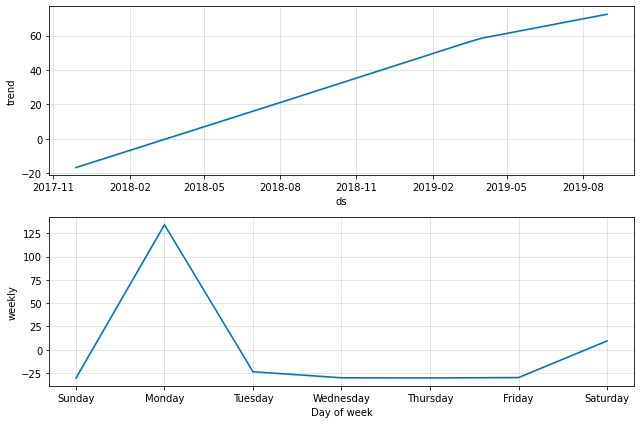

2021-04-02 16:49:20,434 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__search_assets(): sending request to fetch assets.
INFO:__PROJECT_LIB__:AssetsAPIProxy__search_assets(): sending request to fetch assets.
2021-04-02 16:49:20,438 - __PROJECT_LIB__ - INFO - POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:POST https://api.eu-gb.dataplatform.cloud.ibm.com/v2/asset_types/data_asset/search?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
2021-04-02 16:49:20,840 - __PROJECT_LIB__ - INFO - AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
INFO:__PROJECT_LIB__:AssetsAPIProxy__fetch_asset(): sending request to fetch asset.
2021-04-02 16:49:20,842 - __PROJECT_LIB__ - INFO - GET https://api.eu-gb.dataplatform.cloud.ibm.com/v2/assets/f31d59f2-00eb-4e47-8d91-ce73fae63997?project_id=1af029ef-56f6-4f47-93cd-acb6f5ebe987
INFO:__PROJECT_LIB__:GET https://api.eu-gb.dataplatform.cloud.ibm.com

Netherlands forecast:

            ds       yhat
495 2019-08-01  23.854904
496 2019-08-02  24.536460
497 2019-08-03  -8.373405
498 2019-08-04  -4.481875
499 2019-08-05  14.178254
500 2019-08-06  24.413229
501 2019-08-07  10.446892
502 2019-08-08  23.596921
503 2019-08-09  24.278477
504 2019-08-10  -8.631388
505 2019-08-11  -4.739858
506 2019-08-12  13.920271
507 2019-08-13  24.155246
508 2019-08-14  10.188909
509 2019-08-15  23.338938
510 2019-08-16  24.020494
511 2019-08-17  -8.889371
512 2019-08-18  -4.997841
513 2019-08-19  13.662288
514 2019-08-20  23.897263
515 2019-08-21   9.930926
516 2019-08-22  23.080955
517 2019-08-23  23.762511
518 2019-08-24  -9.147354
519 2019-08-25  -5.255824
520 2019-08-26  13.404305
521 2019-08-27  23.639280
522 2019-08-28   9.672943
523 2019-08-29  22.822972
524 2019-08-30  23.504528
Netherlands monthly , and weekly trends:


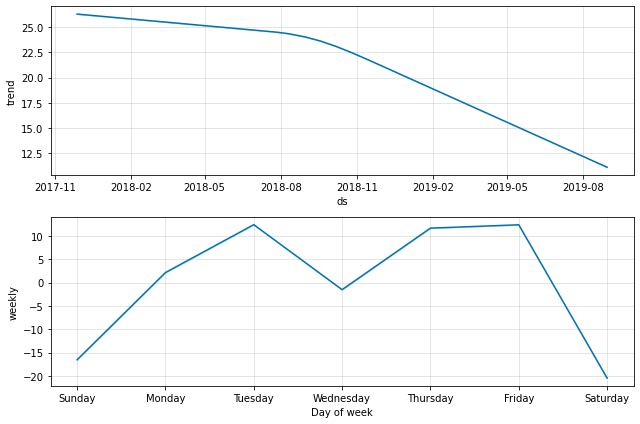

In [103]:
#test loading models, getting 30 day forecasts for each country, and monthly/weekly trends per model
countrydfnamemapping = {
    'United Kingdom' : 'df_Un',
    'Ireland' : 'df_EI',
    'Germany' : 'df_Ge',
    'France' : 'df_Fr',
    'Norway' : 'df_No',
    'Spain' : 'df_Sp',
    'Hong Kong' : 'df_Ho',
    'Portugal' : 'df_Po',
    'Singapore' : 'df_Si',
    'Netherlands' : 'df_Ne'
}

for country in countrydfnamemapping.keys():
    loadedmodel = load_model(country)
    future = loadedmodel.make_future_dataframe(periods=30)
    forecast = loadedmodel.predict(future)
    print(country + ' forecast:')
    print()
    print(forecast[['ds', 'yhat']].tail(30))
    print(country + ' monthly , and weekly trends:')
    loadedmodel.component_modes
    plt.show()
    loadedmodel.plot_components(forecast)
    plt.show()